In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import os
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [ ]:
data_dir = '/content/drive/MyDrive/Skin-Cancer(2)'

In [ ]:
from PIL import Image
import os
import numpy as np

data_dir = "/content/drive/MyDrive/Skin-Cancer(2)"
image_size = (100, 100)

images = []
labels = []

label_mapping = {'benign': 0, 'malignant': 1}

for class_name in os.listdir(data_dir):
    class_dir = os.path.join(data_dir, class_name)
    if os.path.isdir(class_dir):
        for image_filename in os.listdir(class_dir):
            image_path = os.path.join(class_dir, image_filename)
            # Open and resize the image
            image = Image.open(image_path)
            image = image.resize(image_size)
            image = np.array(image)
            images.append(image)
            labels.append(label_mapping[class_name])

# Convert lists to numpy arrays
images = np.array(images)
labels = np.array(labels)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.125, random_state=42)

In [ ]:
print("Shape of X_train: ", X_train.shape)
print("Shape of y_train: ", y_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of y_test: ", y_test.shape)
print("Shape of X_val: ", X_val.shape)
print("Shape of y_val: ", y_val.shape)

Shape of X_train:  (3444, 100, 100, 3)
Shape of y_train:  (3444,)
Shape of X_test:  (984, 100, 100, 3)
Shape of y_test:  (984,)
Shape of X_val:  (492, 100, 100, 3)
Shape of y_val:  (492,)


In [ ]:
(_, IMAGE_WIDTH, IMAGE_HEIGHT, IMAGE_CHANNELS) = X_train.shape

print('IMAGE_WIDTH:', IMAGE_WIDTH);
print('IMAGE_HEIGHT:', IMAGE_HEIGHT);
print('IMAGE_CHANNELS:', IMAGE_CHANNELS);

IMAGE_WIDTH: 100
IMAGE_HEIGHT: 100
IMAGE_CHANNELS: 3


In [ ]:
#4. Reshape the data
x_train_with_chanels = X_train.reshape(
    X_train.shape[0],
    IMAGE_WIDTH,
    IMAGE_HEIGHT,
    IMAGE_CHANNELS
)

x_test_with_chanels = X_test.reshape(
    X_test.shape[0],
    IMAGE_WIDTH,
    IMAGE_HEIGHT,
    IMAGE_CHANNELS
)

x_val_with_chanels = X_val.reshape(
    X_val.shape[0],
    IMAGE_WIDTH,
    IMAGE_HEIGHT,
    IMAGE_CHANNELS
)

In [ ]:
print('x_train_with_chanels:', x_train_with_chanels.shape)
print('x_test_with_chanels:', x_test_with_chanels.shape)
print('x_val_with_chanels:', x_val_with_chanels.shape)

x_train_with_chanels: (3444, 100, 100, 3)
x_test_with_chanels: (984, 100, 100, 3)
x_val_with_chanels: (492, 100, 100, 3)


In [ ]:
#5. Normalize the data
x_train_normalized = x_train_with_chanels / 255
x_test_normalized = x_test_with_chanels / 255
x_val_normalized = x_val_with_chanels / 255

In [ ]:
x_train_normalized[0][18]

array([[0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        ],
       [0.

In [ ]:
from tensorflow.keras.utils import to_categorical

y_train_encoded = to_categorical(y_train, num_classes=2)
y_test_encoded = to_categorical(y_test, num_classes=2)
y_val_encoded = to_categorical(y_val, num_classes=2)

In [ ]:
batch_size = 64

# Data augmentation for the training set
train_DataGen = tf.keras.preprocessing.image.ImageDataGenerator(

    rotation_range=40,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Data generator for the validation set (no augmentation)
valid_datagen = tf.keras.preprocessing.image.ImageDataGenerator()

# Data generator for the test set (no augmentation)
test_datagen = tf.keras.preprocessing.image.ImageDataGenerator()

# Create data generators
train_set_conv = train_DataGen.flow(x_train_normalized, y_train_encoded, batch_size=batch_size)
valid_set_conv = valid_datagen.flow(x_val_normalized, y_val_encoded, batch_size=batch_size)
test_set_conv = test_datagen.flow(x_test_normalized, y_test_encoded, batch_size=batch_size)

In [ ]:
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, ZeroPadding2D,\
     Flatten, BatchNormalization, AveragePooling2D, Dense, Activation, Add
from tensorflow.keras.models import Model
from tensorflow.keras import activations
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.regularizers import l2

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Define the CNN model
model = models.Sequential()

# Convolutional Layer 1
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(IMAGE_WIDTH, IMAGE_HEIGHT, IMAGE_CHANNELS)))
model.add(layers.MaxPooling2D((2, 2)))

# Convolutional Layer 2
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

# Convolutional Layer 3
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

# Flatten the output for the fully connected layers
model.add(layers.Flatten())

# Fully Connected Layer 1
model.add(layers.Dense(128, activation='relu'))

# Output Layer
model.add(layers.Dense(10, activation='softmax'))  # Assuming 10 classes

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Print the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 98, 98, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 49, 49, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 47, 47, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 23, 23, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 21, 21, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 10, 10, 128)       0

In [ ]:
# Fit the model to the data
history = model.fit(train_set_conv,
                    steps_per_epoch=len(x_train_normalized) // batch_size,
                    epochs=10,  # You can adjust the number of epochs
                    validation_data=valid_set_conv,
                    validation_steps=len(x_val_normalized) // batch_size)

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(test_set_conv)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

Epoch 1/10


InvalidArgumentError: Graph execution error:

Detected at node categorical_crossentropy/softmax_cross_entropy_with_logits defined at (most recent call last):
  File "/usr/lib/python3.10/runpy.py", line 196, in _run_module_as_main

  File "/usr/lib/python3.10/runpy.py", line 86, in _run_code

  File "/usr/local/lib/python3.10/dist-packages/colab_kernel_launcher.py", line 37, in <module>

  File "/usr/local/lib/python3.10/dist-packages/traitlets/config/application.py", line 992, in launch_instance

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelapp.py", line 619, in start

  File "/usr/local/lib/python3.10/dist-packages/tornado/platform/asyncio.py", line 195, in start

  File "/usr/lib/python3.10/asyncio/base_events.py", line 603, in run_forever

  File "/usr/lib/python3.10/asyncio/base_events.py", line 1909, in _run_once

  File "/usr/lib/python3.10/asyncio/events.py", line 80, in _run

  File "/usr/local/lib/python3.10/dist-packages/tornado/ioloop.py", line 685, in <lambda>

  File "/usr/local/lib/python3.10/dist-packages/tornado/ioloop.py", line 738, in _run_callback

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 825, in inner

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 786, in run

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelbase.py", line 361, in process_one

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 234, in wrapper

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelbase.py", line 261, in dispatch_shell

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 234, in wrapper

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelbase.py", line 539, in execute_request

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 234, in wrapper

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py", line 302, in do_execute

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/zmqshell.py", line 539, in run_cell

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 2975, in run_cell

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3030, in _run_cell

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/async_helpers.py", line 78, in _pseudo_sync_runner

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3257, in run_cell_async

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3473, in run_ast_nodes

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code

  File "<ipython-input-16-bc322981c8b6>", line 2, in <cell line: 2>

  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 65, in error_handler

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1807, in fit

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1401, in train_function

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1384, in step_function

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1373, in run_step

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1151, in train_step

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1209, in compute_loss

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/compile_utils.py", line 277, in __call__

  File "/usr/local/lib/python3.10/dist-packages/keras/src/losses.py", line 143, in __call__

  File "/usr/local/lib/python3.10/dist-packages/keras/src/losses.py", line 270, in call

  File "/usr/local/lib/python3.10/dist-packages/keras/src/losses.py", line 2221, in categorical_crossentropy

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend.py", line 5579, in categorical_crossentropy

logits and labels must be broadcastable: logits_size=[64,10] labels_size=[64,2]
	 [[{{node categorical_crossentropy/softmax_cross_entropy_with_logits}}]] [Op:__inference_train_function_1341]

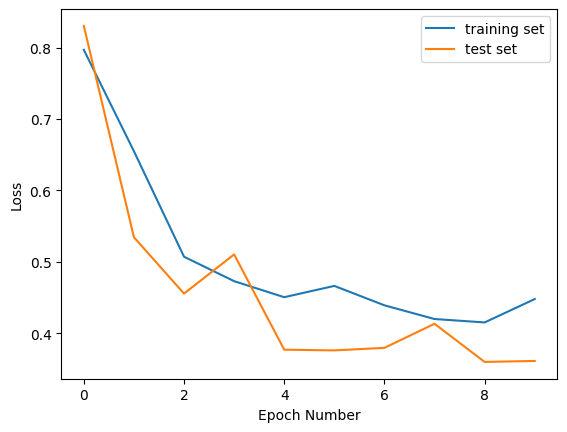

In [ ]:
plt.xlabel('Epoch Number')
plt.ylabel('Loss')
plt.plot(history.history['loss'], label='training set')
plt.plot(history.history['val_loss'], label='test set')
plt.legend()

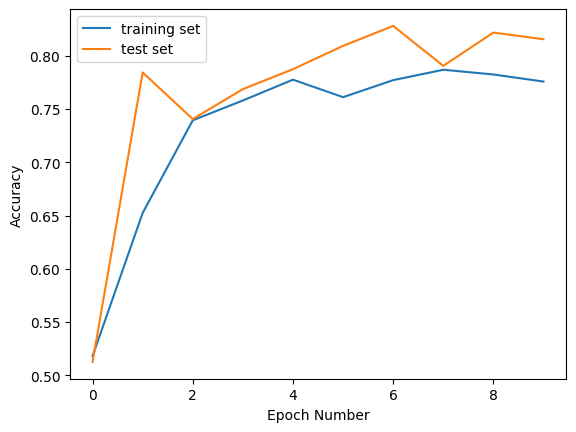

In [ ]:
plt.xlabel('Epoch Number')
plt.ylabel('Accuracy')
plt.plot(history.history['accuracy'], label='training set')
plt.plot(history.history['val_accuracy'], label='test set')
plt.legend()

In [ ]:
train_loss, train_accuracy = model.evaluate(train_set_conv)
print(f"Training Accuracy: {train_accuracy * 100:.2f}%")

37/37 [==============================] - 8s 226ms/step - loss: 0.3993 - accuracy: 0.7959
Training Accuracy: 79.59%


In [ ]:
test_loss, test_accuracy = model.evaluate(test_set_conv)
print(f"Validation Accuracy: {test_accuracy * 100:.2f}%")

11/11 [==============================] - 0s 14ms/step - loss: 0.4000 - accuracy: 0.7994
Validation Accuracy: 79.94%


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import Adam
#ResNet-50 model
def ResNet50(input_shape, num_classes):
    input_tensor = tf.keras.layers.Input(shape=input_shape)

    # Initial Convolution Layer
    x = tf.keras.layers.ZeroPadding2D(padding=(3, 3))(input_tensor)
    x = tf.keras.layers.Conv2D(64, (7, 7), strides=(2, 2), name='conv1')(x)
    x = tf.keras.layers.BatchNormalization(axis=3, name='bn_conv1')(x)
    x = tf.keras.layers.Activation('relu')(x)
    x = tf.keras.layers.ZeroPadding2D(padding=(1, 1))(x)
    x = tf.keras.layers.MaxPooling2D((3, 3), strides=(2, 2))(x)

    # ResNet-50 architecture
    x = tf.keras.layers.Conv2D(64, (1, 1), strides=(1, 1), name='conv2_1')(x)
    x = tf.keras.layers.BatchNormalization(axis=3, name='bn2_1')(x)
    x = tf.keras.layers.Activation('relu')(x)
    x = tf.keras.layers.Conv2D(64, (3, 3), strides=(1, 1), padding='same', name='conv2_2')(x)
    x = tf.keras.layers.BatchNormalization(axis=3, name='bn2_2')(x)
    x = tf.keras.layers.Activation('relu')(x)
    x = tf.keras.layers.Conv2D(256, (1, 1), strides=(1, 1), name='conv2_3')(x)
    x = tf.keras.layers.BatchNormalization(axis=3, name='bn2_3')(x)

    #shortcut
    shortcut = tf.keras.layers.Conv2D(256, (1, 1), strides=(1, 1), name='conv2_4')(x)
    shortcut = tf.keras.layers.BatchNormalization(axis=3, name='bn2_4')(shortcut)
    x = tf.keras.layers.Add()([x, shortcut])
    x = tf.keras.layers.Activation('relu')(x)

    # Fully Connected Layer
    x = tf.keras.layers.AveragePooling2D(pool_size=(7, 7), name='avg_pool')(x)
    x = tf.keras.layers.Flatten()(x)
    x = tf.keras.layers.Dense(num_classes, activation='softmax', name='fc1000')(x)

    model = models.Model(inputs=input_tensor, outputs=x, name='resnet50')

    return model

#ResNet-50 model
input_shape = (IMAGE_WIDTH, IMAGE_HEIGHT, IMAGE_CHANNELS)
num_classes = 2
resnet50_model = ResNet50(input_shape, num_classes)

early_stopping = EarlyStopping(monitor='val_accuracy',  # You can choose 'val_loss' or other metrics
                               patience=10,             # Number of epochs with no improvement before stopping
                               restore_best_weights=True)
optimizer = Adam(learning_rate=0.00001)
resnet50_model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
resnet50_model.summary()



Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_3 (InputLayer)        [(None, 100, 100, 3)]        0         []                            
                                                                                                  
 zero_padding2d_4 (ZeroPadd  (None, 106, 106, 3)          0         ['input_3[0][0]']             
 ing2D)                                                                                           
                                                                                                  
 conv1 (Conv2D)              (None, 50, 50, 64)           9472      ['zero_padding2d_4[0][0]']    
                                                                                                  
 bn_conv1 (BatchNormalizati  (None, 50, 50, 64)           256       ['conv1[0][0]']        

In [ ]:
steps_per_epoch = len(x_train_normalized) // batch_size
validation_steps = len(x_val_normalized) // batch_size

# Train
training_history = resnet50_model.fit(
    train_set_conv,
    steps_per_epoch=steps_per_epoch,
    epochs=25,
    validation_data=valid_set_conv,
    validation_steps=validation_steps,
    callbacks=[early_stopping]
)


Epoch 1/25
53/53 [==============================] - 14s 199ms/step - loss: 0.5849 - accuracy: 0.7056 - val_loss: 0.6942 - val_accuracy: 0.5022
Epoch 2/25
53/53 [==============================] - 10s 189ms/step - loss: 0.3819 - accuracy: 0.8500 - val_loss: 0.6973 - val_accuracy: 0.5357
Epoch 3/25
53/53 [==============================] - 10s 183ms/step - loss: 0.3288 - accuracy: 0.8757 - val_loss: 0.6833 - val_accuracy: 0.5580
Epoch 4/25
53/53 [==============================] - 10s 193ms/step - loss: 0.3060 - accuracy: 0.8802 - val_loss: 0.6673 - val_accuracy: 0.5938
Epoch 5/25
53/53 [==============================] - 10s 194ms/step - loss: 0.2876 - accuracy: 0.8926 - val_loss: 0.6393 - val_accuracy: 0.6518
Epoch 6/25
53/53 [==============================] - 9s 167ms/step - loss: 0.2757 - accuracy: 0.8953 - val_loss: 0.5752 - val_accuracy: 0.7478
Epoch 7/25
53/53 [==============================] - 9s 174ms/step - loss: 0.2662 - accuracy: 0.8902 - val_loss: 0.4901 - val_accuracy: 0.8036
E

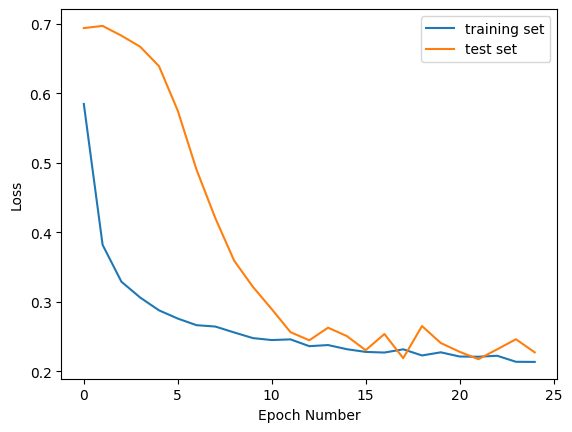

In [ ]:
plt.xlabel('Epoch Number')
plt.ylabel('Loss')
plt.plot(training_history.history['loss'], label='training set')
plt.plot(training_history.history['val_loss'], label='test set')
plt.legend()

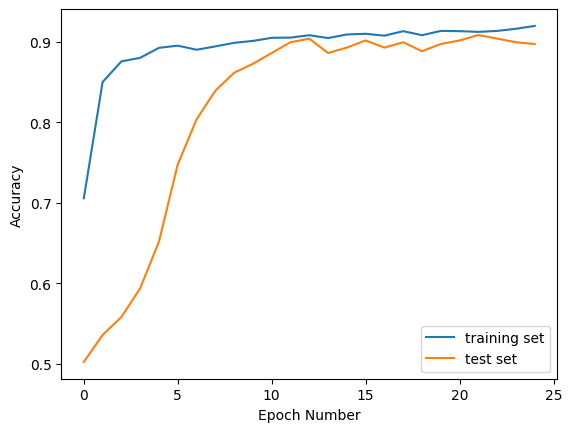

In [ ]:
plt.xlabel('Epoch Number')
plt.ylabel('Accuracy')
plt.plot(training_history.history['accuracy'], label='training set')
plt.plot(training_history.history['val_accuracy'], label='test set')
plt.legend()

In [ ]:
# Evaluate the ResNet-50 model on the training set
train_loss, train_accuracy = resnet50_model.evaluate(train_set_conv, steps=len(x_train_normalized) // batch_size)
print(f"Training Accuracy: {train_accuracy * 100:.2f}%")

# Evaluate the ResNet-50 model on the test set
test_loss, test_accuracy = resnet50_model.evaluate(test_set_conv)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

53/53 [==============================] - 10s 181ms/step - loss: 0.2132 - accuracy: 0.9175
Training Accuracy: 91.75%
16/16 [==============================] - 0s 17ms/step - loss: 0.2246 - accuracy: 0.9106
Test Accuracy: 91.06%


In [ ]:
# Extract features from ResNet-50
x_train_features = resnet50_model.predict(x_train_normalized)
x_val_features = resnet50_model.predict(x_val_normalized)
x_test_features = resnet50_model.predict(x_test_normalized)

31/31 [==============================] - 0s 6ms/step


In [ ]:
x_train_features = x_train_features.reshape(x_train_features.shape[0], -1)
x_val_features = x_val_features.reshape(x_val_features.shape[0], -1)
x_test_features = x_test_features.reshape(x_test_features.shape[0], -1)

In [ ]:
param_grid = {
    'C': [0.1, 1, 10],
    'gamma': [0.01, 0.1, 1],
    'kernel': ['rbf', 'linear', 'poly']
}


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix


# Define the SVM classifier
svm_model = SVC()

# Create GridSearchCV with the parameter grid and cross-validation
grid_search = GridSearchCV(estimator=svm_model, param_grid=param_grid, cv=3, n_jobs=-1)

# Perform the grid search on the training data
grid_search.fit(x_train_features, y_train)

# Print the best hyperparameters found by the grid search
print("Best Hyperparameters:", grid_search.best_params_)

# Get the best SVM model from the grid search
best_svm_model = grid_search.best_estimator_

# Evaluate the best model on the test data
y_pred_svm = best_svm_model.predict(x_test_features)

svm_accuracy = accuracy_score(y_test, y_pred_svm)
svm_precision = precision_score(y_test, y_pred_svm)
svm_recall = recall_score(y_test, y_pred_svm)
svm_f1 = f1_score(y_test, y_pred_svm)

tn, fp, fn, tp = confusion_matrix(y_test, y_pred_svm).ravel()
svm_specificity = tn / (tn + fp)

print("SVM Accuracy:", svm_accuracy)
print("SVM Precision:", svm_precision)
print("SVM Sensitivity (Recall):", svm_recall)
print("SVM Specificity:", svm_specificity)
print("SVM F1 Score:", svm_f1)



Best Hyperparameters: {'C': 10, 'gamma': 0.1, 'kernel': 'poly'}
SVM Accuracy: 0.9136178861788617
SVM Precision: 0.9356136820925554
SVM Sensitivity (Recall): 0.8976833976833977
SVM Specificity: 0.9313304721030042
SVM F1 Score: 0.916256157635468


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

# Define the parameter distributions for RandomizedSearchCV
param_dist = {
    'n_estimators': [100, 200, 300, 400],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10, 15],
    'min_samples_leaf': [1, 2, 4, 8],
    'max_features': ['auto', 'sqrt']
}

# Instantiate the Random Forest classifier
rf_model = RandomForestClassifier(random_state=42)

# Instantiate RandomizedSearchCV with the model, parameter distributions, and evaluation metric
random_search = RandomizedSearchCV(estimator=rf_model, param_distributions=param_dist, n_iter=50, cv=3, n_jobs=-1, random_state=42, scoring='accuracy')

# Early stopping parameters
max_epochs = 25  # Maximum number of epochs to train
patience = 5  # Number of epochs to wait for improvement
counter = 0  # Counter to keep track of epochs with no improvement
best_accuracy = 0  # Best validation accuracy

# Training loop with early stopping
for epoch in range(max_epochs):
    # Perform the randomized search on your training data (x_train_features, y_train)
    random_search.fit(x_train_features, y_train)

    # Get the best hyperparameters and best model
    best_params = random_search.best_params_
    best_rf_model = random_search.best_estimator_

    # Evaluate the model on the validation data
    y_pred_val = best_rf_model.predict(x_val_features)
    val_accuracy = accuracy_score(y_val, y_pred_val)

    print("Epoch {}: Validation Accuracy: {:.4f}".format(epoch, val_accuracy))

    # Check for improvement in validation accuracy
    if val_accuracy > best_accuracy:
        best_accuracy = val_accuracy
        counter = 0
    else:
        counter += 1

    # Early stopping condition
    if counter >= patience:
        print("Early stopping after {} epochs of no improvement.".format(epoch))
        break

# Evaluate the best model on the test data (x_test_features, y_test)
y_pred_rf = best_rf_model.predict(x_test_features)
rf_accuracy = accuracy_score(y_test, y_pred_rf)
rf_precision = precision_score(y_test, y_pred_rf)
rf_recall = recall_score(y_test, y_pred_rf)
rf_f1 = f1_score(y_test, y_pred_rf)

tn, fp, fn, tp = confusion_matrix(y_test, y_pred_rf).ravel()
rf_specificity = tn / (tn + fp)

print("Best Hyperparameters:", best_params)
print("Random Forest Accuracy:", rf_accuracy)
print("Random Forest Precision:", rf_precision)
print("Random Forest Sensitivity (Recall):", rf_recall)
print("Random Forest Specificity:", rf_specificity)
print("Random Forest F1 Score:", rf_f1)





/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Epoch 0: Validation Accuracy: 0.9045


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Epoch 1: Validation Accuracy: 0.9045


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Epoch 2: Validation Accuracy: 0.9045


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Epoch 3: Validation Accuracy: 0.9045


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Epoch 4: Validation Accuracy: 0.9045


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Epoch 5: Validation Accuracy: 0.9045
Early stopping after 5 epochs of no improvement.
Best Hyperparameters: {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 8, 'max_features': 'auto', 'max_depth': 20}
Random Forest Accuracy: 0.9024390243902439
Random Forest Precision: 0.9271255060728745
Random Forest Sensitivity (Recall): 0.8841698841698842
Random Forest Specificity: 0.9227467811158798
Random Forest F1 Score: 0.9051383399209486


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Instantiate the KNN classifier
knn_model = KNeighborsClassifier(n_neighbors=5)

# Early stopping parameters
max_epochs = 10  # Maximum number of epochs (iterations) to train
patience = 5  # Number of epochs to wait for improvement
best_accuracy = 0  # Best validation accuracy
counter = 0  # Counter to keep track of epochs with no improvement

# Training loop with early stopping
for epoch in range(max_epochs):
    # Train the KNN model
    knn_model.fit(x_train_features, y_train)

    # Validate the model on the validation data
    y_pred_val = knn_model.predict(x_val_features)
    val_accuracy = accuracy_score(y_val, y_pred_val)

    print("Epoch {}: Validation Accuracy: {:.4f}".format(epoch, val_accuracy))

    # Check for improvement in validation accuracy
    if val_accuracy > best_accuracy:
        best_accuracy = val_accuracy
        counter = 0
    else:
        counter += 1

    # Early stopping condition
    if counter >= patience:
        print("Early stopping after {} epochs of no improvement.".format(epoch))
        break

# Evaluate the best model on the test data
y_pred_test = knn_model.predict(x_test_features)
knn_accuracy = accuracy_score(y_test, y_pred_test)
knn_precision = precision_score(y_test, y_pred_test)
knn_recall = recall_score(y_test, y_pred_test)
knn_f1 = f1_score(y_test, y_pred_test)

tn, fp, fn, tp = confusion_matrix(y_test, y_pred_test).ravel()
knn_specificity = tn / (tn + fp)

print("KNN Accuracy:", knn_accuracy)
print("KNN Precision:", knn_precision)
print("KNN Sensitivity (Recall):", knn_recall)
print("KNN Specificity:", knn_specificity)
print("KNN F1 Score:", knn_f1)


Epoch 0: Validation Accuracy: 0.9024
Epoch 1: Validation Accuracy: 0.9024
Epoch 2: Validation Accuracy: 0.9024
Epoch 3: Validation Accuracy: 0.9024
Epoch 4: Validation Accuracy: 0.9024
Epoch 5: Validation Accuracy: 0.9024
Early stopping after 5 epochs of no improvement.
KNN Accuracy: 0.8973577235772358
KNN Precision: 0.9195171026156942
KNN Sensitivity (Recall): 0.8822393822393823
KNN Specificity: 0.9141630901287554
KNN F1 Score: 0.9004926108374384


In [ ]:
import tensorflow as tf
import os
import numpy as np
from PIL import Image
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.models import Model


def VGG16(input_shape, num_classes):
    inputs = Input(shape=input_shape)

    # Block 1
    x = Conv2D(64, (3, 3), activation='relu', padding='same', name='block1_conv1')(inputs)
    x = Conv2D(64, (3, 3), activation='relu', padding='same', name='block1_conv2')(x)
    x = MaxPooling2D((2, 2), strides=(2, 2), name='block1_pool')(x)

    # Block 2
    x = Conv2D(128, (3, 3), activation='relu', padding='same', name='block2_conv1')(x)
    x = Conv2D(128, (3, 3), activation='relu', padding='same', name='block2_conv2')(x)
    x = MaxPooling2D((2, 2), strides=(2, 2), name='block2_pool')(x)

    # Block 3
    x = Conv2D(256, (3, 3), activation='relu', padding='same', name='block3_conv1')(x)
    x = Conv2D(256, (3, 3), activation='relu', padding='same', name='block3_conv2')(x)
    x = Conv2D(256, (3, 3), activation='relu', padding='same', name='block3_conv3')(x)
    x = MaxPooling2D((2, 2), strides=(2, 2), name='block3_pool')(x)

    # Block 4
    x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block4_conv1')(x)
    x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block4_conv2')(x)
    x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block4_conv3')(x)
    x = MaxPooling2D((2, 2), strides=(2, 2), name='block4_pool')(x)

    # Block 5
    x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block5_conv1')(x)
    x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block5_conv2')(x)
    x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block5_conv3')(x)
    x = MaxPooling2D((2, 2), strides=(2, 2), name='block5_pool')(x)

    # Flatten and Fully Connected Layers
    x = Flatten(name='flatten')(x)
    x = Dense(4096, activation='relu', name='fc1')(x)
    x = Dropout(0.5)(x)
    x = Dense(4096, activation='relu', name='fc2')(x)
    x = Dropout(0.5)(x)
    predictions = Dense(num_classes, activation='softmax', name='predictions')(x)

    # Create the model
    model = Model(inputs=inputs, outputs=predictions)
    return model

# Modify the input shape and number of classes based on your needs
input_shape = (100, 100, 3)
num_classes = 2

model = VGG16(input_shape, num_classes)

# Print model summary
model.summary()


Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 100, 100, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 100, 100, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 100, 100, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 50, 50, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 50, 50, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 50, 50, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 25, 25, 128)       0   

In [ ]:
from tensorflow.keras.optimizers import Adam

# Define learning rate
learning_rate = 0.00001

# Compile the model with the specified learning rate
optimizer = Adam(learning_rate=learning_rate)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Define steps per epoch and validation steps
steps_per_epoch = len(x_train_normalized) // batch_size
validation_steps = len(x_val_normalized) // batch_size

# Train the VGG16 model
history = model.fit(
    train_set_conv,
    steps_per_epoch=steps_per_epoch,
    epochs=25,  # You can adjust the number of epochs
    validation_data=valid_set_conv,
    validation_steps=validation_steps
)







Epoch 1/25
53/53 [==============================] - 26s 304ms/step - loss: 0.6895 - accuracy: 0.5266 - val_loss: 0.6718 - val_accuracy: 0.5960
Epoch 2/25
53/53 [==============================] - 14s 259ms/step - loss: 0.5402 - accuracy: 0.7541 - val_loss: 0.4464 - val_accuracy: 0.7991
Epoch 3/25
53/53 [==============================] - 14s 271ms/step - loss: 0.3756 - accuracy: 0.8364 - val_loss: 0.3361 - val_accuracy: 0.8661
Epoch 4/25
53/53 [==============================] - 14s 256ms/step - loss: 0.3501 - accuracy: 0.8441 - val_loss: 0.3308 - val_accuracy: 0.8683
Epoch 5/25
53/53 [==============================] - 14s 260ms/step - loss: 0.3253 - accuracy: 0.8583 - val_loss: 0.3139 - val_accuracy: 0.8772
Epoch 6/25
53/53 [==============================] - 14s 259ms/step - loss: 0.3195 - accuracy: 0.8583 - val_loss: 0.3422 - val_accuracy: 0.8638
Epoch 7/25
53/53 [==============================] - 14s 261ms/step - loss: 0.3094 - accuracy: 0.8630 - val_loss: 0.3339 - val_accuracy: 0.8638

In [ ]:
# Evaluate the model on the training set
train_loss, train_accuracy = model.evaluate(train_set_conv, steps=steps_per_epoch)
print(f'Training Loss: {train_loss:.4f}')
print(f'Training Accuracy: {train_accuracy * 100:.2f}%')

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(test_set_conv)
print(f'Test Loss: {test_loss:.4f}')
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')




53/53 [==============================] - 11s 202ms/step - loss: 0.2291 - accuracy: 0.9068
Training Loss: 0.2291
Training Accuracy: 90.68%
16/16 [==============================] - 2s 146ms/step - loss: 0.2361 - accuracy: 0.9096
Test Loss: 0.2361
Test Accuracy: 90.96%


In [ ]:
x_train_features = model.predict(x_train_normalized)
x_val_features = model.predict(x_val_normalized)
x_test_features = model.predict(x_test_normalized)

31/31 [==============================] - 1s 30ms/step


In [ ]:
x_train_features = x_train_features.reshape(x_train_features.shape[0], -1)
x_val_features = x_val_features.reshape(x_val_features.shape[0], -1)
x_test_features = x_test_features.reshape(x_test_features.shape[0], -1)

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# SVM Classifier
svm_model = SVC(kernel='rbf', C=2, gamma='scale')

# Early stopping parameters
max_epochs = 25  # Maximum number of epochs (iterations) to train
patience = 5  # Number of epochs to wait for improvement
best_accuracy = 0  # Best validation accuracy
counter = 0  # Counter to keep track of epochs with no improvement

# Training loop with early stopping
for epoch in range(max_epochs):
    # Train the SVM model
    svm_model.fit(x_train_features, y_train)

    # Validate the model on the validation data
    y_pred_val = svm_model.predict(x_val_features)
    val_accuracy = accuracy_score(y_val, y_pred_val)

    print("Epoch {}: Validation Accuracy: {:.4f}".format(epoch, val_accuracy))

    # Check for improvement in validation accuracy
    if val_accuracy > best_accuracy:
        best_accuracy = val_accuracy
        counter = 0
    else:
        counter += 1

    # Early stopping condition
    if counter >= patience:
        print("Early stopping after {} epochs of no improvement.".format(epoch))
        break

# Evaluate the best model on the test data
y_pred_test = svm_model.predict(x_test_features)
svm_accuracy = accuracy_score(y_test, y_pred_test)
svm_precision = precision_score(y_test, y_pred_test)
svm_recall = recall_score(y_test, y_pred_test)
svm_f1 = f1_score(y_test, y_pred_test)

tn, fp, fn, tp = confusion_matrix(y_test, y_pred_test).ravel()
svm_specificity = tn / (tn + fp)

print("SVM Accuracy:", svm_accuracy)
print("SVM Precision:", svm_precision)
print("SVM Sensitivity (Recall):", svm_recall)
print("SVM Specificity:", svm_specificity)
print("SVM F1 Score:", svm_f1)


Epoch 0: Validation Accuracy: 0.8984
Epoch 1: Validation Accuracy: 0.8984
Epoch 2: Validation Accuracy: 0.8984
Epoch 3: Validation Accuracy: 0.8984
Epoch 4: Validation Accuracy: 0.8984
Epoch 5: Validation Accuracy: 0.8984
Early stopping after 5 epochs of no improvement.
SVM Accuracy: 0.9085365853658537
SVM Precision: 0.9458333333333333
SVM Sensitivity (Recall): 0.8764478764478765
SVM Specificity: 0.944206008583691
SVM F1 Score: 0.9098196392785571


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import numpy as np

# Define the parameter distributions for RandomizedSearchCV
param_dist = {
    'n_estimators': [100, 200, 300, 400],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10, 15],
    'min_samples_leaf': [1, 2, 4, 8],
    'max_features': ['auto', 'sqrt']
}

# Instantiate the Random Forest classifier
rf_model = RandomForestClassifier(random_state=42)

# Instantiate RandomizedSearchCV with the model, parameter distributions, and evaluation metric
random_search = RandomizedSearchCV(estimator=rf_model, param_distributions=param_dist, n_iter=50, cv=3, n_jobs=-1, random_state=42, scoring='accuracy')

# Perform the randomized search on your training data (x_train_features, y_train)
random_search.fit(x_train_features, y_train)

# Get the best hyperparameters and best model
best_params = random_search.best_params_
best_rf_model = random_search.best_estimator_

# Evaluate the best model on the test data (x_test_features, y_test)
y_pred_rf = best_rf_model.predict(x_test_features)
rf_accuracy = accuracy_score(y_test, y_pred_rf)
rf_precision = precision_score(y_test, y_pred_rf)
rf_recall = recall_score(y_test, y_pred_rf)
rf_f1 = f1_score(y_test, y_pred_rf)

tn, fp, fn, tp = confusion_matrix(y_test, y_pred_rf).ravel()
rf_specificity = tn / (tn + fp)

print("Best Hyperparameters:", best_params)
print("Random Forest Accuracy:", rf_accuracy)
print("Random Forest Precision:", rf_precision)
print("Random Forest Sensitivity (Recall):", rf_recall)
print("Random Forest Specificity:", rf_specificity)
print("Random Forest F1 Score:", rf_f1)



/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Best Hyperparameters: {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 8, 'max_features': 'auto', 'max_depth': 20}
Random Forest Accuracy: 0.899390243902439
Random Forest Precision: 0.9466950959488273
Random Forest Sensitivity (Recall): 0.8571428571428571
Random Forest Specificity: 0.9463519313304721
Random Forest F1 Score: 0.8996960486322189


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for GridSearchCV
param_grid = {
    'n_neighbors': [3, 5, 7, 9],  # Example values for the number of neighbors
    'weights': ['uniform', 'distance'],  # Example values for the weight function
    'p': [1, 2]  # Example values for the power parameter (1 for Manhattan distance, 2 for Euclidean distance)
}

# Instantiate the KNN classifier
knn_model = KNeighborsClassifier()

# Instantiate GridSearchCV with the model and parameter grid
grid_search = GridSearchCV(estimator=knn_model, param_grid=param_grid, cv=3, n_jobs=-1, scoring='accuracy')

# Perform grid search on your training data (x_train_features, y_train)
grid_search.fit(x_train_features, y_train)

# Get the best hyperparameters and best model
best_params = grid_search.best_params_
best_knn_model = grid_search.best_estimator_

# Print the best hyperparameters
print("Best Hyperparameters:", best_params)

# Evaluate the best model on the test data (x_test_features, y_test)
y_pred_knn = best_knn_model.predict(x_test_features)
knn_accuracy = accuracy_score(y_test, y_pred_knn)
knn_precision = precision_score(y_test, y_pred_knn)
knn_recall = recall_score(y_test, y_pred_knn)
knn_f1 = f1_score(y_test, y_pred_knn)

tn, fp, fn, tp = confusion_matrix(y_test, y_pred_knn).ravel()
knn_specificity = tn / (tn + fp)

print("KNN Accuracy:", knn_accuracy)
print("KNN Precision:", knn_precision)
print("KNN Sensitivity (Recall):", knn_recall)
print("KNN Specificity:", knn_specificity)
print("KNN F1 Score:", knn_f1)

# The best trained KNN model is stored in the variable 'best_knn_model'


Best Hyperparameters: {'n_neighbors': 9, 'p': 1, 'weights': 'uniform'}
KNN Accuracy: 0.8963414634146342
KNN Precision: 0.940677966101695
KNN Sensitivity (Recall): 0.8571428571428571
KNN Specificity: 0.9399141630901288
KNN F1 Score: 0.896969696969697


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models

def ShuffleNet(input_shape, num_classes):
    def group(input, groups, in_channels, out_channels):
        group_list = []
        for i in range(groups):
            x = layers.Conv2D(out_channels // groups, (1, 1), use_bias=False)(input)
            x = layers.BatchNormalization()(x)
            x = layers.Activation('relu')(x)
            group_list.append(x)
        if groups == 1:
            return group_list[0]
        else:
            return layers.Concatenate()(group_list)

    def channel_shuffle(x, groups):
        _, width, height, channels = x.shape
        group_channels = channels // groups
        x = tf.reshape(x, [-1, width, height, group_channels, groups])
        x = tf.transpose(x, [0, 1, 2, 4, 3])
        x = tf.reshape(x, [-1, width, height, channels])
        return x

    input_tensor = tf.keras.layers.Input(shape=input_shape)
    x = layers.Conv2D(24, (3, 3), strides=(2, 2), padding='same', use_bias=False)(input_tensor)
    x = layers.BatchNormalization()(x)
    x = layers.Activation('relu')(x)
    x = layers.MaxPooling2D((3, 3), strides=(2, 2), padding='same')(x)

    x = group(x, 4, 24, 384)
    x = layers.Conv2D(196, (1, 1), use_bias=False)(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation('relu')(x)
    x = channel_shuffle(x, 4)
    x = layers.DepthwiseConv2D((3, 3), padding='same', use_bias=False)(x)
    x = layers.BatchNormalization()(x)
    x = layers.Conv2D(196, (1, 1), use_bias=False)(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation('relu')(x)

    x = group(x, 4, 196, 384)
    x = layers.Conv2D(392, (1, 1), use_bias=False)(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation('relu')(x)
    x = channel_shuffle(x, 4)
    x = layers.DepthwiseConv2D((3, 3), padding='same', use_bias=False)(x)
    x = layers.BatchNormalization()(x)
    x = layers.Conv2D(392, (1, 1), use_bias=False)(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation('relu')(x)

    x = group(x, 4, 392, 784)
    x = layers.Conv2D(196, (1, 1), use_bias=False)(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation('relu')(x)
    x = channel_shuffle(x, 4)
    x = layers.DepthwiseConv2D((3, 3), padding='same', use_bias=False)(x)
    x = layers.BatchNormalization()(x)
    x = layers.Conv2D(196, (1, 1), use_bias=False)(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation('relu')(x)

    x = layers.GlobalAveragePooling2D()(x)
    x = layers.Dense(num_classes, activation='softmax')(x)

    model = models.Model(inputs=input_tensor, outputs=x, name='shufflenet')

    return model

input_shape = (100, 100, 3)
num_classes = 2
shufflenet_model = ShuffleNet(input_shape, num_classes)

# Compile model
from tensorflow.keras.optimizers import Adam
optimizer = Adam(learning_rate=0.00001)
shufflenet_model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

shufflenet_model.summary()

Model: "shufflenet"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_6 (InputLayer)        [(None, 100, 100, 3)]        0         []                            
                                                                                                  
 conv2d_3 (Conv2D)           (None, 50, 50, 24)           648       ['input_6[0][0]']             
                                                                                                  
 batch_normalization (Batch  (None, 50, 50, 24)           96        ['conv2d_3[0][0]']            
 Normalization)                                                                                   
                                                                                                  
 activation_12 (Activation)  (None, 50, 50, 24)           0         ['batch_normalization

In [ ]:
from tensorflow.keras.optimizers import Adam


# Define steps per epoch and validation steps
steps_per_epoch = len(x_train_normalized) // batch_size
validation_steps = len(x_val_normalized) // batch_size

# Train the model
history = shufflenet_model.fit(
    train_set_conv,
    steps_per_epoch=steps_per_epoch,
    epochs=25,  # You can adjust the number of epochs
    validation_data=valid_set_conv,
    validation_steps=validation_steps
)

Epoch 1/25
53/53 [==============================] - 28s 288ms/step - loss: 0.5917 - accuracy: 0.6423 - val_loss: 0.6932 - val_accuracy: 0.4888
Epoch 2/25
53/53 [==============================] - 13s 238ms/step - loss: 0.4121 - accuracy: 0.8180 - val_loss: 0.6938 - val_accuracy: 0.4888
Epoch 3/25
53/53 [==============================] - 13s 244ms/step - loss: 0.3542 - accuracy: 0.8574 - val_loss: 0.6959 - val_accuracy: 0.4844
Epoch 4/25
53/53 [==============================] - 13s 237ms/step - loss: 0.3245 - accuracy: 0.8695 - val_loss: 0.7004 - val_accuracy: 0.4821
Epoch 5/25
53/53 [==============================] - 13s 236ms/step - loss: 0.3073 - accuracy: 0.8722 - val_loss: 0.7065 - val_accuracy: 0.4888
Epoch 6/25
53/53 [==============================] - 13s 239ms/step - loss: 0.2985 - accuracy: 0.8787 - val_loss: 0.7226 - val_accuracy: 0.4799
Epoch 7/25
53/53 [==============================] - 13s 235ms/step - loss: 0.2839 - accuracy: 0.8840 - val_loss: 0.7386 - val_accuracy: 0.4777

In [ ]:
# Evaluate the model on the training data
train_loss, train_accuracy = shufflenet_model.evaluate(train_set_conv, steps=steps_per_epoch)
print(f"Training Loss: {train_loss:.4f}")
print(f"Training Accuracy: {train_accuracy * 100:.2f}%")

# Evaluate the model on the test data
test_loss, test_accuracy = shufflenet_model.evaluate(test_set_conv, steps=validation_steps)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")




53/53 [==============================] - 11s 198ms/step - loss: 0.1797 - accuracy: 0.9316
Training Loss: 0.1797
Training Accuracy: 93.16%
7/7 [==============================] - 0s 51ms/step - loss: 0.2356 - accuracy: 0.9152
Test Loss: 0.2356
Test Accuracy: 91.52%


In [ ]:
x_train_features = shufflenet_model.predict(x_train_normalized)
x_val_features = shufflenet_model.predict(x_val_normalized)
x_test_features = shufflenet_model.predict(x_test_normalized)

31/31 [==============================] - 1s 41ms/step


In [ ]:
x_train_features = x_train_features.reshape(x_train_features.shape[0], -1)
x_val_features = x_val_features.reshape(x_val_features.shape[0], -1)
x_test_features = x_test_features.reshape(x_test_features.shape[0], -1)

In [ ]:
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for GridSearchCV
param_grid = {
    'C': [0.1, 1, 10, 100],  # Example values for the regularization parameter
    'gamma': ['scale', 'auto', 0.1, 1]  # Example values for the kernel coefficient (gamma) parameter
}

# Instantiate the SVM classifier
svm_model = SVC(kernel='rbf')

# Early stopping parameters
max_epochs = 25  # Maximum number of epochs (iterations) to train
patience = 5  # Number of epochs to wait for improvement
best_accuracy = 0  # Best validation accuracy
counter = 0  # Counter to keep track of epochs with no improvement

# Training loop with early stopping and hyperparameter tuning using GridSearchCV
for epoch in range(max_epochs):
    # Perform grid search on your training data (x_train_features, y_train)
    grid_search = GridSearchCV(estimator=svm_model, param_grid=param_grid, cv=3, n_jobs=-1, scoring='accuracy')
    grid_search.fit(x_train_features, y_train)

    # Get the best hyperparameters and best model
    best_params = grid_search.best_params_
    best_svm_model = grid_search.best_estimator_

    # Validate the best model on the validation data
    y_pred_val = best_svm_model.predict(x_val_features)
    val_accuracy = accuracy_score(y_val, y_pred_val)

    print("Epoch {}: Validation Accuracy: {:.4f}".format(epoch, val_accuracy))

    # Check for improvement in validation accuracy
    if val_accuracy > best_accuracy:
        best_accuracy = val_accuracy
        counter = 0
    else:
        counter += 1

    # Early stopping condition
    if counter >= patience:
        print("Early stopping after {} epochs of no improvement.".format(epoch))
        break

# Evaluate the best model on the test data
y_pred_svm = best_svm_model.predict(x_test_features)
svm_accuracy = accuracy_score(y_test, y_pred_svm)
svm_precision = precision_score(y_test, y_pred_svm)
svm_recall = recall_score(y_test, y_pred_svm)
svm_f1 = f1_score(y_test, y_pred_svm)

tn, fp, fn, tp = confusion_matrix(y_test, y_pred_svm).ravel()
svm_specificity = tn / (tn + fp)

print("Best Hyperparameters:", best_params)
print("SVM Accuracy:", svm_accuracy)
print("SVM Precision:", svm_precision)
print("SVM Sensitivity (Recall):", svm_recall)
print("SVM Specificity:", svm_specificity)
print("SVM F1 Score:", svm_f1)


Epoch 0: Validation Accuracy: 0.9106
Epoch 1: Validation Accuracy: 0.9106
Epoch 2: Validation Accuracy: 0.9106
Epoch 3: Validation Accuracy: 0.9106
Epoch 4: Validation Accuracy: 0.9106
Epoch 5: Validation Accuracy: 0.9106
Early stopping after 5 epochs of no improvement.
Best Hyperparameters: {'C': 0.1, 'gamma': 'auto'}
SVM Accuracy: 0.9186991869918699
SVM Precision: 0.9487704918032787
SVM Sensitivity (Recall): 0.8938223938223938
SVM Specificity: 0.9463519313304721
SVM F1 Score: 0.9204771371769384


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.model_selection import GridSearchCV, cross_val_score

# Define a wider range of hyperparameters for the grid search
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Instantiate the Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)

# Perform Grid Search with cross-validation
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=3, n_jobs=-1, scoring='accuracy')

# Fit the grid search to the data
grid_search.fit(x_train_features, y_train)

# Get the best hyperparameters and best model
best_params = grid_search.best_params_
best_rf_model = grid_search.best_estimator_

# Evaluate the best model using cross-validation
cv_scores = cross_val_score(best_rf_model, x_train_features, y_train, cv=5, scoring='accuracy')
mean_cv_accuracy = cv_scores.mean()

# Evaluate the best model on the test data
y_pred_rf = best_rf_model.predict(x_test_features)
rf_accuracy = accuracy_score(y_test, y_pred_rf)
rf_precision = precision_score(y_test, y_pred_rf)
rf_recall = recall_score(y_test, y_pred_rf)
rf_f1 = f1_score(y_test, y_pred_rf)

tn, fp, fn, tp = confusion_matrix(y_test, y_pred_rf).ravel()
rf_specificity = tn / (tn + fp)

print("Best Hyperparameters:", best_params)
print("Mean Cross-Validation Accuracy:", mean_cv_accuracy)
print("Random Forest Accuracy on Test Data:", rf_accuracy)
print("Random Forest Precision:", rf_precision)
print("Random Forest Sensitivity (Recall):", rf_recall)
print("Random Forest Specificity:", rf_specificity)
print("Random Forest F1 Score:", rf_f1)


Best Hyperparameters: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 100}
Mean Cross-Validation Accuracy: 0.9236330036790765
Random Forest Accuracy on Test Data: 0.915650406504065
Random Forest Precision: 0.9447852760736196
Random Forest Sensitivity (Recall): 0.8918918918918919
Random Forest Specificity: 0.9420600858369099
Random Forest F1 Score: 0.9175769612711022


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.model_selection import cross_val_score

# Define a wider range of neighbors for RandomizedSearchCV
param_dist = {
    'n_neighbors': list(range(1, 101))  # Experiment with a wider range of neighbors (1 to 100)
}

# Instantiate the KNN Classifier
knn_model = KNeighborsClassifier()

# Perform RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=knn_model, param_distributions=param_dist, n_iter=30, cv=3, n_jobs=-1, scoring='accuracy')

# Fit the randomized search to the data
random_search.fit(x_train_features, y_train)

# Get the best hyperparameters and best model
best_params = random_search.best_params_
best_knn_model = random_search.best_estimator_

# Evaluate the best model using cross-validation
cv_scores = cross_val_score(best_knn_model, x_train_features, y_train, cv=5, scoring='accuracy')
mean_cv_accuracy = cv_scores.mean()

# Evaluate the best model on the test data
y_pred_knn = best_knn_model.predict(x_test_features)
knn_accuracy = accuracy_score(y_test, y_pred_knn)
knn_precision = precision_score(y_test, y_pred_knn)
knn_recall = recall_score(y_test, y_pred_knn)
knn_f1 = f1_score(y_test, y_pred_knn)

tn, fp, fn, tp = confusion_matrix(y_test, y_pred_knn).ravel()
knn_specificity = tn / (tn + fp)

print("Best Hyperparameters:", best_params)
print("Mean Cross-Validation Accuracy:", mean_cv_accuracy)
print("KNN Accuracy on Test Data:", knn_accuracy)
print("KNN Precision:", knn_precision)
print("KNN Sensitivity (Recall):", knn_recall)
print("KNN Specificity:", knn_specificity)
print("KNN F1 Score:", knn_f1)



Best Hyperparameters: {'n_neighbors': 79}
Mean Cross-Validation Accuracy: 0.932342542275627
KNN Accuracy on Test Data: 0.9176829268292683
KNN Precision: 0.945010183299389
KNN Sensitivity (Recall): 0.8957528957528957
KNN Specificity: 0.9420600858369099
KNN F1 Score: 0.9197224975222993


In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, DepthwiseConv2D, BatchNormalization, ReLU, GlobalAveragePooling2D, Dense

def MobileNetCustom(input_shape, num_classes):
    input_tensor = Input(shape=input_shape)

    # Initial Convolution Layer
    x = Conv2D(32, (3, 3), strides=(2, 2), padding='same')(input_tensor)
    x = BatchNormalization()(x)
    x = ReLU()(x)

    # Depthwise Convolution Blocks
    def depthwise_block(x, filters, strides):
        x = DepthwiseConv2D((3, 3), strides=strides, padding='same')(x)
        x = BatchNormalization()(x)
        x = ReLU()(x)
        x = Conv2D(filters, (1, 1), padding='same')(x)
        x = BatchNormalization()(x)
        x = ReLU()(x)
        return x

    x = depthwise_block(x, 64, (1, 1))
    x = depthwise_block(x, 128, (2, 2))
    x = depthwise_block(x, 128, (1, 1))
    x = depthwise_block(x, 256, (2, 2))
    x = depthwise_block(x, 256, (1, 1))
    x = depthwise_block(x, 512, (2, 2))

    # Global Average Pooling
    x = GlobalAveragePooling2D()(x)

    # Fully Connected Layer
    x = Dense(num_classes, activation='softmax')(x)

    model = tf.keras.Model(inputs=input_tensor, outputs=x)

    return model

input_shape = (100, 100, 3)
num_classes = 2
mobilenet_custom_model = MobileNetCustom(input_shape, num_classes)

optimizer = tf.keras.optimizers.Adam(learning_rate=0.00001)
mobilenet_custom_model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
early_stopping = EarlyStopping(monitor='val_accuracy',  # You can choose 'val_loss' or other metrics
                               patience=10,             # Number of epochs with no improvement before stopping
                               restore_best_weights=True)

mobilenet_custom_model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 100, 100, 3)]     0         
                                                                 
 conv2d_22 (Conv2D)          (None, 50, 50, 32)        896       
                                                                 
 batch_normalization_22 (Ba  (None, 50, 50, 32)        128       
 tchNormalization)                                               
                                                                 
 re_lu (ReLU)                (None, 50, 50, 32)        0         
                                                                 
 depthwise_conv2d_3 (Depthw  (None, 50, 50, 32)        320       
 iseConv2D)                                                      
                                                                 
 batch_normalization_23 (Ba  (None, 50, 50, 32)        128 

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Perform hyperparameter tuning with early stopping
best_accuracy = 0
best_hyperparameters = None

for epoch in range(25):
    # Train the model with the current hyperparameters
    training_history = mobilenet_custom_model.fit(
        train_set_conv,
        steps_per_epoch=steps_per_epoch,
        epochs=1,  # Train for one epoch at a time
        validation_data=valid_set_conv,
        validation_steps=validation_steps,
        callbacks=[early_stopping]
    )

    # Get the validation accuracy from the training history
    val_accuracy = training_history.history['val_accuracy'][0]

    # Check for improvement in validation accuracy
    if val_accuracy > best_accuracy:
        best_accuracy = val_accuracy
        best_hyperparameters = mobilenet_custom_model.get_config()  # Save the best hyperparameters

    print("Epoch {}: Validation Accuracy: {:.4f}".format(epoch, val_accuracy))

    # Early stopping condition
    if early_stopping.stopped_epoch > 0:
        print("Early stopping after {} epochs of no improvement.".format(early_stopping.stopped_epoch))
        break

# Evaluate the model with the best hyperparameters on the test data
test_accuracy = mobilenet_custom_model.evaluate(test_set_conv)[1]
print("Best Validation Accuracy:", best_accuracy)
print("Test Accuracy with Best Hyperparameters:", test_accuracy)
print("Best Hyperparameters:", best_hyperparameters)



53/53 [==============================] - 20s 214ms/step - loss: 0.6716 - accuracy: 0.5186 - val_loss: 0.6933 - val_accuracy: 0.4844
Epoch 0: Validation Accuracy: 0.4844
53/53 [==============================] - 11s 208ms/step - loss: 0.5662 - accuracy: 0.7130 - val_loss: 0.6969 - val_accuracy: 0.4911
Epoch 1: Validation Accuracy: 0.4911
53/53 [==============================] - 11s 198ms/step - loss: 0.5049 - accuracy: 0.8000 - val_loss: 0.7113 - val_accuracy: 0.4866
Epoch 2: Validation Accuracy: 0.4866
53/53 [==============================] - 10s 198ms/step - loss: 0.4618 - accuracy: 0.8228 - val_loss: 0.7309 - val_accuracy: 0.4888
Epoch 3: Validation Accuracy: 0.4888
53/53 [==============================] - 10s 179ms/step - loss: 0.4199 - accuracy: 0.8379 - val_loss: 0.7684 - val_accuracy: 0.4732
Epoch 4: Validation Accuracy: 0.4732
53/53 [==============================] - 10s 190ms/step - loss: 0.3987 - accuracy: 0.8396 - val_loss: 0.7821 - val_accuracy: 0.4933
Epoch 5: Validation Acc

In [ ]:
# Evaluate the model on the training data
train_loss, train_accuracy = mobilenet_custom_model.evaluate(train_set_conv, steps=steps_per_epoch)
print(f"Training Loss: {train_loss:.4f}")
print(f"Training Accuracy: {train_accuracy * 100:.2f}%")

# Evaluate the model on the test data
test_loss, test_accuracy = mobilenet_custom_model.evaluate(test_set_conv, steps=validation_steps)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")


53/53 [==============================] - 10s 181ms/step - loss: 0.2502 - accuracy: 0.9021
Training Loss: 0.2502
Training Accuracy: 90.21%
7/7 [==============================] - 0s 18ms/step - loss: 0.2451 - accuracy: 0.9018
Test Loss: 0.2451
Test Accuracy: 90.18%


In [ ]:
x_train_features = mobilenet_custom_model.predict(x_train_normalized)
x_val_features = mobilenet_custom_model.predict(x_val_normalized)
x_test_features = mobilenet_custom_model.predict(x_test_normalized)

31/31 [==============================] - 0s 6ms/step


In [ ]:
x_train_features = x_train_features.reshape(x_train_features.shape[0], -1)
x_val_features = x_val_features.reshape(x_val_features.shape[0], -1)
x_test_features = x_test_features.reshape(x_test_features.shape[0], -1)

In [ ]:
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [ ]:
pip install scikit-optimize


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.3/100.3 kB 2.4 MB/s eta 0:00:00


In [ ]:
# Support Vector Machine (SVM) with L2 Regularization-like behavior
svm_model = SVC(kernel='rbf', C=1, gamma=0.006184517020465486)  # Set a smaller C for L2 regularization
svm_model.fit(x_train_features, y_train)
y_pred_svm = svm_model.predict(x_test_features)

svm_accuracy = accuracy_score(y_test, y_pred_svm)
svm_precision = precision_score(y_test, y_pred_svm)
svm_recall = recall_score(y_test, y_pred_svm)
svm_f1 = f1_score(y_test, y_pred_svm)

tn, fp, fn, tp = confusion_matrix(y_test, y_pred_svm).ravel()
svm_specificity = tn / (tn + fp)

print("SVM Accuracy:", svm_accuracy)
print("SVM Precision:", svm_precision)
print("SVM Sensitivity (Recall):", svm_recall)
print("SVM Specificity:", svm_specificity)
print("SVM F1 Score:", svm_f1)


SVM Accuracy: 0.8882113821138211
SVM Precision: 0.9015748031496063
SVM Sensitivity (Recall): 0.8841698841698842
SVM Specificity: 0.8927038626609443
SVM F1 Score: 0.8927875243664717


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Define the parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],  # Number of trees in the forest
    'max_depth': [None, 10, 20, 30],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4]  # Minimum number of samples required to be at a leaf node
}

# Instantiate the Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)

# Perform Grid Search with cross-validation
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=3, n_jobs=-1, scoring='accuracy')

# Fit the grid search to the data
grid_search.fit(x_train_features, y_train)

# Get the best hyperparameters and best model
best_params = grid_search.best_params_
best_rf_model = grid_search.best_estimator_

# Evaluate the best model on the test data
y_pred_rf = best_rf_model.predict(x_test_features)
rf_accuracy = accuracy_score(y_test, y_pred_rf)
rf_precision = precision_score(y_test, y_pred_rf)
rf_recall = recall_score(y_test, y_pred_rf)
rf_f1 = f1_score(y_test, y_pred_rf)

tn, fp, fn, tp = confusion_matrix(y_test, y_pred_rf).ravel()
rf_specificity = tn / (tn + fp)

print("Best Hyperparameters:", best_params)
print("Random Forest Accuracy:", rf_accuracy)
print("Random Forest Precision:", rf_precision)
print("Random Forest Sensitivity (Recall):", rf_recall)
print("Random Forest Specificity:", rf_specificity)
print("Random Forest F1 Score:", rf_f1)


Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 100}
Random Forest Accuracy: 0.8800813008130082
Random Forest Precision: 0.8952569169960475
Random Forest Sensitivity (Recall): 0.8745173745173745
Random Forest Specificity: 0.8862660944206009
Random Forest F1 Score: 0.8847656250000001


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Define the parameter grid for GridSearchCV
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11]  # Example values for the number of neighbors (k)
}

# Instantiate the KNN Classifier
knn_model = KNeighborsClassifier()

# Early stopping parameters
max_epochs = 25  # Maximum number of epochs (iterations) to train
patience = 5  # Number of epochs to wait for improvement
best_accuracy = 0  # Best validation accuracy
counter = 0  # Counter to keep track of epochs with no improvement

# Training loop with early stopping and hyperparameter tuning using GridSearchCV
for epoch in range(max_epochs):
    # Perform grid search on your training data (x_train_features, y_train)
    grid_search = GridSearchCV(estimator=knn_model, param_grid=param_grid, cv=3, n_jobs=-1, scoring='accuracy')
    grid_search.fit(x_train_features, y_train)

    # Get the best hyperparameters and best model
    best_params = grid_search.best_params_
    best_knn_model = grid_search.best_estimator_

    # Validate the best model on the validation data
    y_pred_val = best_knn_model.predict(x_val_features)
    val_accuracy = accuracy_score(y_val, y_pred_val)

    print("Epoch {}: Validation Accuracy: {:.4f}".format(epoch, val_accuracy))

    # Check for improvement in validation accuracy
    if val_accuracy > best_accuracy:
        best_accuracy = val_accuracy
        counter = 0
    else:
        counter += 1

    # Early stopping condition
    if counter >= patience:
        print("Early stopping after {} epochs of no improvement.".format(epoch))
        break

# Evaluate the best model on the test data
y_pred_knn = best_knn_model.predict(x_test_features)
knn_accuracy = accuracy_score(y_test, y_pred_knn)
knn_precision = precision_score(y_test, y_pred_knn)
knn_recall = recall_score(y_test, y_pred_knn)
knn_f1 = f1_score(y_test, y_pred_knn)

tn, fp, fn, tp = confusion_matrix(y_test, y_pred_knn).ravel()
knn_specificity = tn / (tn + fp)

print("Best Hyperparameters:", best_params)
print("KNN Accuracy on Test Data:", knn_accuracy)
print("KNN Precision:", knn_precision)
print("KNN Sensitivity (Recall):", knn_recall)
print("KNN Specificity:", knn_specificity)
print("KNN F1 Score:", knn_f1)


Epoch 0: Validation Accuracy: 0.8943
Epoch 1: Validation Accuracy: 0.8943
Epoch 2: Validation Accuracy: 0.8943
Epoch 3: Validation Accuracy: 0.8943
Epoch 4: Validation Accuracy: 0.8943
Epoch 5: Validation Accuracy: 0.8943
Early stopping after 5 epochs of no improvement.
Best Hyperparameters: {'n_neighbors': 7}
KNN Accuracy on Test Data: 0.8821138211382114
KNN Precision: 0.8988095238095238
KNN Sensitivity (Recall): 0.8745173745173745
KNN Specificity: 0.8905579399141631
KNN F1 Score: 0.8864970645792565


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, BatchNormalization, Activation, MaxPooling2D, GlobalAveragePooling2D, Dense, AveragePooling2D, Concatenate

# Define your input shape and number of classes
IMAGE_WIDTH, IMAGE_HEIGHT, IMAGE_CHANNELS = 100, 100, 3
NUM_CLASSES = 2

# Define the dense block
def dense_block(x, growth_rate):
    x1 = BatchNormalization()(x)
    x1 = Activation('relu')(x1)
    x1 = Conv2D(4 * growth_rate, (1, 1), padding='same')(x1)

    x1 = BatchNormalization()(x1)
    x1 = Activation('relu')(x1)
    x1 = Conv2D(growth_rate, (3, 3), padding='same')(x1)

    x = Concatenate()([x, x1])
    return x

# Define the transition layer
def transition_block(x, reduction):
    num_filters = int(x.shape[-1])
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = Conv2D(int(num_filters * reduction), (1, 1), padding='same')(x)
    x = AveragePooling2D((2, 2), strides=(2, 2))(x)
    return x

# Define the input shape
input_shape = (IMAGE_WIDTH, IMAGE_HEIGHT, IMAGE_CHANNELS)
input_tensor = Input(shape=input_shape)

# Initial Convolution
x = Conv2D(64, (7, 7), strides=(2, 2), padding='same')(input_tensor)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = MaxPooling2D((3, 3), strides=(2, 2), padding='same')(x)

# Dense Blocks
for _ in range(6):
    x = dense_block(x, 32)

x = transition_block(x, 0.5)

for _ in range(12):
    x = dense_block(x, 32)

x = transition_block(x, 0.5)

for _ in range(48):
    x = dense_block(x, 32)

# Global Average Pooling
x = GlobalAveragePooling2D()(x)

# Fully Connected Layer
output = Dense(NUM_CLASSES, activation='softmax')(x)

# Create the model
model = Model(inputs=input_tensor, outputs=output)

# Compile the model with a learning rate of 0.00001
optimizer = tf.keras.optimizers.Adam(learning_rate=0.00001)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Print the model summary
model.summary()




Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 100, 100, 3)]        0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 50, 50, 64)           9472      ['input_1[0][0]']             
                                                                                                  
 batch_normalization (Batch  (None, 50, 50, 64)           256       ['conv2d[0][0]']              
 Normalization)                                                                                   
                                                                                                  
 activation (Activation)     (None, 50, 50, 64)           0         ['batch_normalization[0][0

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

learning_rate = 0.00001
optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])



# Define steps per epoch and validation steps
steps_per_epoch = len(x_train_normalized) // batch_size
validation_steps = len(x_val_normalized) // batch_size

# Train the model with early stopping
history = model.fit(
    train_set_conv,
    steps_per_epoch=steps_per_epoch,
    epochs=25,  # You can adjust the number of epochs
    validation_data=valid_set_conv,
    validation_steps=validation_steps,

)

Epoch 1/25
53/53 [==============================] - 129s 465ms/step - loss: 0.3973 - accuracy: 0.8299 - val_loss: 0.6963 - val_accuracy: 0.5179
Epoch 2/25
53/53 [==============================] - 17s 305ms/step - loss: 0.3011 - accuracy: 0.8751 - val_loss: 0.7615 - val_accuracy: 0.5201
Epoch 3/25
53/53 [==============================] - 15s 289ms/step - loss: 0.2625 - accuracy: 0.8979 - val_loss: 0.7534 - val_accuracy: 0.5067
Epoch 4/25
53/53 [==============================] - 16s 290ms/step - loss: 0.2516 - accuracy: 0.8971 - val_loss: 0.7407 - val_accuracy: 0.4353
Epoch 5/25
53/53 [==============================] - 15s 288ms/step - loss: 0.2344 - accuracy: 0.9068 - val_loss: 0.8959 - val_accuracy: 0.5112
Epoch 6/25
53/53 [==============================] - 16s 291ms/step - loss: 0.2275 - accuracy: 0.9104 - val_loss: 0.8650 - val_accuracy: 0.5469
Epoch 7/25
53/53 [==============================] - 16s 301ms/step - loss: 0.2172 - accuracy: 0.9160 - val_loss: 1.1394 - val_accuracy: 0.562

In [ ]:
# Evaluate the model on the training data
train_loss, train_accuracy = model.evaluate(train_set_conv, steps=steps_per_epoch)
print(f"Training Loss: {train_loss:.4f}")
print(f"Training Accuracy: {train_accuracy * 100:.2f}%")

# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(test_set_conv, steps=validation_steps)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")


53/53 [==============================] - 12s 223ms/step - loss: 0.1280 - accuracy: 0.9522
Training Loss: 0.1280
Training Accuracy: 95.22%
7/7 [==============================] - 1s 70ms/step - loss: 0.2881 - accuracy: 0.9018
Test Loss: 0.2881
Test Accuracy: 90.18%


In [ ]:
x_train_features = model.predict(x_train_normalized)
x_val_features = model.predict(x_val_normalized)
x_test_features = model.predict(x_test_normalized)

31/31 [==============================] - 3s 113ms/step


In [ ]:
x_train_features = x_train_features.reshape(x_train_features.shape[0], -1)
x_val_features = x_val_features.reshape(x_val_features.shape[0], -1)
x_test_features = x_test_features.reshape(x_test_features.shape[0], -1)

In [ ]:
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [ ]:
# Support Vector Machine (SVM)
svm_model = SVC(kernel='rbf', C=4, gamma='scale')
svm_model.fit(x_train_features, y_train)
y_pred_svm = svm_model.predict(x_test_features)

svm_accuracy = accuracy_score(y_test, y_pred_svm)
svm_precision = precision_score(y_test, y_pred_svm)
svm_recall = recall_score(y_test, y_pred_svm)
svm_f1 = f1_score(y_test, y_pred_svm)

tn, fp, fn, tp = confusion_matrix(y_test, y_pred_svm).ravel()
svm_specificity = tn / (tn + fp)

print("SVM Accuracy:", svm_accuracy)
print("SVM Precision:", svm_precision)
print("SVM Sensitivity (Recall):", svm_recall)
print("SVM Specificity:", svm_specificity)
print("SVM F1 Score:", svm_f1)


SVM Accuracy: 0.9197154471544715
SVM Precision: 0.9452332657200812
SVM Sensitivity (Recall): 0.8996138996138996
SVM Specificity: 0.9420600858369099
SVM F1 Score: 0.9218595450049455


In [ ]:
# Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(x_train_features, y_train)
y_pred_rf = rf_model.predict(x_test_features)

rf_accuracy = accuracy_score(y_test, y_pred_rf)
rf_precision = precision_score(y_test, y_pred_rf)
rf_recall = recall_score(y_test, y_pred_rf)
rf_f1 = f1_score(y_test, y_pred_rf)

tn, fp, fn, tp = confusion_matrix(y_test, y_pred_rf).ravel()
rf_specificity = tn / (tn + fp)

print("Random Forest Accuracy:", rf_accuracy)
print("Random Forest Precision:", rf_precision)
print("Random Forest Sensitivity (Recall):", rf_recall)
print("Random Forest Specificity:", rf_specificity)
print("Random Forest F1 Score:", rf_f1)

Random Forest Accuracy: 0.9034552845528455
Random Forest Precision: 0.9255533199195171
Random Forest Sensitivity (Recall): 0.888030888030888
Random Forest Specificity: 0.9206008583690987
Random Forest F1 Score: 0.9064039408866996


In [ ]:
# K-Nearest Neighbors Classifier
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(x_train_features, y_train)
y_pred_knn = knn_model.predict(x_test_features)

knn_accuracy = accuracy_score(y_test, y_pred_knn)
knn_precision = precision_score(y_test, y_pred_knn)
knn_recall = recall_score(y_test, y_pred_knn)
knn_f1 = f1_score(y_test, y_pred_knn)

tn, fp, fn, tp = confusion_matrix(y_test, y_pred_knn).ravel()
knn_specificity = tn / (tn + fp)

print("KNN Accuracy:", knn_accuracy)
print("KNN Precision:", knn_precision)
print("KNN Sensitivity (Recall):", knn_recall)
print("KNN Specificity:", knn_specificity)
print("KNN F1 Score:", knn_f1)

KNN Accuracy: 0.915650406504065
KNN Precision: 0.937625754527163
KNN Sensitivity (Recall): 0.8996138996138996
KNN Specificity: 0.9334763948497854
KNN F1 Score: 0.9182266009852217


Hybrid (RESNET-50

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, BatchNormalization, ReLU, DepthwiseConv2D, GlobalAveragePooling2D, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.regularizers import l2
from tensorflow.keras.layers import Dropout

# Define input shape
input_shape = (100, 100, 3)  # Assuming input images have shape (224, 224, 3)
num_classes = 2  # Number of output classes

# Build ResNet50-like architecture
def build_resnet50(input_shape):
    input_tensor = Input(shape=input_shape)

    # Initial convolutional layer
    x = Conv2D(64, (7, 7), strides=(2, 2), padding='same')(input_tensor)
    x = BatchNormalization()(x)
    x = ReLU()(x)

    # Residual blocks
    x = resnet_block(x, filters=[64, 64, 256], strides=1, block_name='block1')
    x = resnet_block(x, filters=[128, 128, 512], strides=2, block_name='block2')
    x = resnet_block(x, filters=[256, 256, 1024], strides=2, block_name='block3')
    x = resnet_block(x, filters=[512, 512, 2048], strides=2, block_name='block4')

    # Global Average Pooling
    x = GlobalAveragePooling2D()(x)

    return Model(inputs=input_tensor, outputs=x)

# Define MobileNet-like architecture
def build_mobilenet(input_shape):
    input_tensor = Input(shape=input_shape)

    # Initial depthwise separable convolution
    x = DepthwiseConv2D((3, 3), strides=(2, 2), padding='same')(input_tensor)
    x = BatchNormalization()(x)
    x = ReLU()(x)

    # Depthwise separable convolutions
    x = mobilenet_block(x, filters=128, strides=1, block_name='block1')
    x = mobilenet_block(x, filters=256, strides=2, block_name='block2')
    x = mobilenet_block(x, filters=512, strides=2, block_name='block3')
    x = mobilenet_block(x, filters=1024, strides=2, block_name='block4')

    # Global Average Pooling
    x = GlobalAveragePooling2D()(x)

    return Model(inputs=input_tensor, outputs=x)

# ResNet block
def resnet_block(input_tensor, filters, strides, block_name):
    x = Conv2D(filters[0], (1, 1), strides=strides, padding='same', name=block_name+'_conv1')(input_tensor)
    x = BatchNormalization()(x)
    x = ReLU()(x)

    x = Conv2D(filters[1], (3, 3), padding='same', name=block_name+'_conv2')(x)
    x = BatchNormalization()(x)
    x = ReLU()(x)

    x = Conv2D(filters[2], (1, 1), padding='same', name=block_name+'_conv3')(x)
    x = BatchNormalization()(x)

    # Shortcut connection
    shortcut = Conv2D(filters[2], (1, 1), strides=strides, padding='same', name=block_name+'_shortcut')(input_tensor)
    shortcut = BatchNormalization()(shortcut)

    # Add shortcut to the output
    x = tf.keras.layers.add([x, shortcut])
    x = ReLU()(x)

    return x

# MobileNet block
def mobilenet_block(input_tensor, filters, strides, block_name):
    x = DepthwiseConv2D((3, 3), strides=strides, padding='same', name=block_name+'_depthwise')(input_tensor)
    x = BatchNormalization()(x)
    x = ReLU()(x)

    x = Conv2D(filters, (1, 1), padding='same', name=block_name+'_pointwise')(x)
    x = BatchNormalization()(x)
    x = ReLU()(x)

    return x

# Build ResNet50 model
resnet_model = build_resnet50(input_shape)

# Build MobileNet model
mobilenet_model = build_mobilenet(input_shape)

# Concatenate the output tensors from ResNet50 and MobileNet
concatenated_output = tf.keras.layers.Concatenate()([resnet_model.output, mobilenet_model.output])

# Add custom dense layers for classification with regularization
dense_layer = Dense(128, activation='relu', kernel_regularizer=l2(0.001))(concatenated_output)
dense_layer = Dropout(0.5)(dense_layer)  # Adding dropout with a rate of 0.5

output_layer = Dense(num_classes, activation='softmax', kernel_regularizer=l2(0.001))(dense_layer)

# Create the hybrid model with regularization
hybrid_model_regularized = Model(inputs=[resnet_model.input, mobilenet_model.input], outputs=output_layer)

# Compile the model
hybrid_model_regularized.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Print summary of the model architecture
hybrid_model_regularized.summary()


Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 100, 100, 3)]        0         []                            
                                                                                                  
 conv2d_135 (Conv2D)         (None, 50, 50, 64)           9472      ['input_2[0][0]']             
                                                                                                  
 batch_normalization_135 (B  (None, 50, 50, 64)           256       ['conv2d_135[0][0]']          
 atchNormalization)                                                                               
                                                                                                  
 re_lu (ReLU)                (None, 50, 50, 64)           0         ['batch_normalization_13

In [ ]:
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
from tensorflow.keras.layers import Dropout

# Assuming you have your optimizer, data, and other parameters defined

learning_rate = 0.00001
optimizer = Adam(learning_rate=learning_rate)

# ... (Define x_train_normalized, x_val_normalized, y_train, y_val, batch_size, etc.)

# Build the hybrid model with regularization (using previously modified code)
# ... (Code for building the model as previously shown)

# Compile the model
hybrid_model_regularized.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

epochs = 25

# Train the regularized model
history_regularized = hybrid_model_regularized.fit(
    [x_train_normalized, x_train_normalized],
    y_train,
    epochs=epochs,
    batch_size=batch_size,
    validation_data=([x_val_normalized, x_val_normalized], y_val)
)


Epoch 1/25
54/54 [==============================] - 50s 469ms/step - loss: 0.7030 - accuracy: 0.7866 - val_loss: 0.9428 - val_accuracy: 0.4878
Epoch 2/25
54/54 [==============================] - 13s 243ms/step - loss: 0.5431 - accuracy: 0.8792 - val_loss: 0.9727 - val_accuracy: 0.4878
Epoch 3/25
54/54 [==============================] - 13s 244ms/step - loss: 0.5040 - accuracy: 0.8961 - val_loss: 1.0306 - val_accuracy: 0.4878
Epoch 4/25
54/54 [==============================] - 13s 243ms/step - loss: 0.4776 - accuracy: 0.9059 - val_loss: 1.0844 - val_accuracy: 0.4878
Epoch 5/25
54/54 [==============================] - 13s 243ms/step - loss: 0.4637 - accuracy: 0.9123 - val_loss: 1.2099 - val_accuracy: 0.4878
Epoch 6/25
54/54 [==============================] - 13s 243ms/step - loss: 0.4528 - accuracy: 0.9216 - val_loss: 1.1208 - val_accuracy: 0.5061
Epoch 7/25
54/54 [==============================] - 13s 243ms/step - loss: 0.4347 - accuracy: 0.9254 - val_loss: 1.0667 - val_accuracy: 0.5366

In [ ]:
# Evaluate on the training set
train_evaluation = hybrid_model_regularized.evaluate([x_train_normalized, x_train_normalized], y_train)
train_loss = train_evaluation[0]
train_accuracy = train_evaluation[1]

print(f"Training Loss: {train_loss:.4f}")
print(f"Training Accuracy: {train_accuracy:.4f}")

# Evaluate on the test set
test_evaluation = hybrid_model_regularized.evaluate([x_test_normalized, x_test_normalized], y_test)
test_loss = test_evaluation[0]
test_accuracy = test_evaluation[1]

print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")


108/108 [==============================] - 7s 48ms/step - loss: 0.2492 - accuracy: 0.9901
Training Loss: 0.2492
Training Accuracy: 0.9901
31/31 [==============================] - 3s 82ms/step - loss: 0.4309 - accuracy: 0.9197
Test Loss: 0.4309
Test Accuracy: 0.9197


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Create an instance of ImageDataGenerator for augmentation
datagen = ImageDataGenerator(
    rotation_range=20,  # Random rotation within the range of (-20, 20) degrees
    width_shift_range=0.1,  # Randomly shift images horizontally (10% of total width)
    height_shift_range=0.1,  # Randomly shift images vertically (10% of total height)
    shear_range=0.2,  # Shear intensity (20%)
    zoom_range=0.2,  # Zoom randomly within 20% range
    horizontal_flip=True,  # Randomly flip images horizontally
    fill_mode='nearest'  # Strategy for filling in newly created pixels
)

# Fit the ImageDataGenerator on your original training data
datagen.fit(x_train_normalized)

# Define the number of augmented images you want to generate
num_augmented_images = 1000  # Modify this based on your requirement

# Generate augmented images using the ImageDataGenerator
augmented_data = datagen.flow(x_train_normalized, y_train, batch_size=num_augmented_images)

# Retrieve augmented images and labels
x_augmented, y_augmented = augmented_data.next()

# Concatenate augmented data with original data
x_combined = np.concatenate((x_train_normalized, x_augmented))
y_combined = np.concatenate((y_train, y_augmented))

# Train the model using the augmented dataset
# ... (continue with model creation, compilation, and training using x_combined, y_combined)


In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Assuming you have your hybrid model already trained and stored in hybrid_model_regularized

# Extract features from the hybrid model for training, validation, and test sets
x_train_features = hybrid_model_regularized.predict([x_train_normalized, x_train_normalized])
x_val_features = hybrid_model_regularized.predict([x_val_normalized, x_val_normalized])
x_test_features = hybrid_model_regularized.predict([x_test_normalized, x_test_normalized])



31/31 [==============================] - 1s 32ms/step


In [ ]:
x_train_features = x_train_features.reshape(x_train_features.shape[0], -1)
x_val_features = x_val_features.reshape(x_val_features.shape[0], -1)
x_test_features = x_test_features.reshape(x_test_features.shape[0], -1)

In [ ]:
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix



# Define the best hyperparameters obtained from GridSearchCV
best_params = {'C': 6, 'gamma': 'scale'}  # Replace these values with the best parameters found

# Train SVM model with the best hyperparameters
svm_model = SVC(kernel='rbf', C=best_params['C'], gamma=best_params['gamma'])
svm_model.fit(x_train_features, y_train)

# Predict on the test set using the trained SVM model
y_pred_svm = svm_model.predict(x_test_features)

# Calculate evaluation metrics
svm_accuracy = accuracy_score(y_test, y_pred_svm)
svm_precision = precision_score(y_test, y_pred_svm)
svm_recall = recall_score(y_test, y_pred_svm)
svm_f1 = f1_score(y_test, y_pred_svm)

# Calculate specificity
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_svm).ravel()
svm_specificity = tn / (tn + fp)

# Print evaluation metrics
print("SVM Accuracy:", svm_accuracy)
print("SVM Precision:", svm_precision)
print("SVM Sensitivity (Recall):", svm_recall)
print("SVM Specificity:", svm_specificity)
print("SVM F1 Score:", svm_f1)

SVM Accuracy: 0.9278455284552846
SVM Precision: 0.9496981891348089
SVM Sensitivity (Recall): 0.9111969111969112
SVM Specificity: 0.9463519313304721
SVM F1 Score: 0.9300492610837438


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Create an instance of ImageDataGenerator for augmentation
datagen = ImageDataGenerator(
    rotation_range=20,  # Random rotation within the range of (-20, 20) degrees
    width_shift_range=0.1,  # Randomly shift images horizontally (10% of total width)
    height_shift_range=0.1,  # Randomly shift images vertically (10% of total height)
    shear_range=0.2,  # Shear intensity (20%)
    zoom_range=0.2,  # Zoom randomly within 20% range
    horizontal_flip=True,  # Randomly flip images horizontally
    fill_mode='nearest'  # Strategy for filling in newly created pixels
)

# Fit the ImageDataGenerator on your original training data
datagen.fit(x_train_normalized)

# Define the number of augmented images you want to generate
num_augmented_images = 2000  # Modify this based on your requirement

# Generate augmented images using the ImageDataGenerator
augmented_data = datagen.flow(x_train_normalized, y_train, batch_size=num_augmented_images)

# Retrieve augmented images and labels
x_augmented, y_augmented = augmented_data.next()

# Concatenate augmented data with original data
x_combined = np.concatenate((x_train_normalized, x_augmented))
y_combined = np.concatenate((y_train, y_augmented))

# Train the model using the augmented dataset
# ... (continue with model creation, compilation, and training using x_combined, y_combined)

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, BatchNormalization, ReLU, GlobalAveragePooling2D, Dense, Concatenate
from tensorflow.keras.models import Model

# Define MobileNet-inspired architecture
def MobileNetCustom(input_shape):
    input_tensor = Input(shape=input_shape)

    # Initial Convolution Layer
    x = Conv2D(32, (3, 3), strides=(2, 2), padding='same')(input_tensor)
    x = BatchNormalization()(x)
    x = ReLU()(x)
    # Add more layers as per your MobileNet design

    # Global Average Pooling
    x = GlobalAveragePooling2D()(x)

    return Model(inputs=input_tensor, outputs=x)

# Define DenseNet-inspired architecture
def DenseNetCustom(input_shape):
    input_tensor = Input(shape=input_shape)

    # Define your DenseNet-like architecture
    # ... Add layers as per your DenseNet design

    # Global Average Pooling
    x = GlobalAveragePooling2D()(input_tensor)

    return Model(inputs=input_tensor, outputs=x)

# Input shape and number of classes
input_shape = (100, 100, 3)
num_classes = 2

# Build MobileNet and DenseNet branches
mobilenet_model = MobileNetCustom(input_shape)
densenet_model = DenseNetCustom(input_shape)

# Get the outputs of the two models
mobilenet_output = mobilenet_model.output
densenet_output = densenet_model.output

# Concatenate the outputs
merged_output = Concatenate()([mobilenet_output, densenet_output])

# Add more layers for classification
x = Dense(256, activation='relu')(merged_output)
x = Dense(128, activation='relu')(x)
predictions = Dense(num_classes, activation='softmax')(x)

# Create the hybrid model
hybrid_model = Model(inputs=[mobilenet_model.input, densenet_model.input], outputs=predictions)

# Compile the model
hybrid_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Display the summary of the hybrid model
hybrid_model.summary()


Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 100, 100, 3)]        0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 50, 50, 32)           896       ['input_1[0][0]']             
                                                                                                  
 batch_normalization (Batch  (None, 50, 50, 32)           128       ['conv2d[0][0]']              
 Normalization)                                                                                   
                                                                                                  
 re_lu (ReLU)                (None, 50, 50, 32)           0         ['batch_normalization[0]

In [ ]:
from tensorflow.keras.optimizers import Adam

# Set the learning rate
learning_rate = 0.00001

# Compile the model with the specified learning rate
hybrid_model.compile(optimizer=Adam(learning_rate=learning_rate),
                     loss='categorical_crossentropy',
                     metrics=['accuracy'])

# Train the hybrid model for 25 epochs with the specified learning rate
history = hybrid_model.fit(
    [x_train_normalized, x_train_normalized],  # Replace with your training data
    y_train_encoded,  # Replace with your training labels
    epochs=65,
    batch_size=batch_size,
    validation_data=([x_val_normalized, x_val_normalized], y_val_encoded),  # Replace with your validation data
    shuffle=True,
    verbose=1
)


Epoch 1/65
54/54 [==============================] - 7s 66ms/step - loss: 0.3007 - accuracy: 0.8667 - val_loss: 0.2906 - val_accuracy: 0.8841
Epoch 2/65
54/54 [==============================] - 2s 38ms/step - loss: 0.3028 - accuracy: 0.8635 - val_loss: 0.2898 - val_accuracy: 0.8841
Epoch 3/65
54/54 [==============================] - 1s 24ms/step - loss: 0.3015 - accuracy: 0.8659 - val_loss: 0.2902 - val_accuracy: 0.8841
Epoch 4/65
54/54 [==============================] - 1s 23ms/step - loss: 0.2981 - accuracy: 0.8682 - val_loss: 0.2907 - val_accuracy: 0.8841
Epoch 5/65
54/54 [==============================] - 2s 29ms/step - loss: 0.3003 - accuracy: 0.8638 - val_loss: 0.2909 - val_accuracy: 0.8841
Epoch 6/65
54/54 [==============================] - 1s 19ms/step - loss: 0.3018 - accuracy: 0.8676 - val_loss: 0.2899 - val_accuracy: 0.8862
Epoch 7/65
54/54 [==============================] - 1s 15ms/step - loss: 0.3005 - accuracy: 0.8673 - val_loss: 0.2905 - val_accuracy: 0.8841
Epoch 8/65
54

In [ ]:
# Evaluate the model on the test data
test_loss, test_accuracy = hybrid_model.evaluate([x_test_normalized, x_test_normalized], y_test_encoded)

print(f"Test Accuracy: {test_accuracy * 100:.2f}%")
print(f"Test Loss: {test_loss}")

31/31 [==============================] - 0s 8ms/step - loss: 0.3073 - accuracy: 0.8659
Test Accuracy: 86.59%
Test Loss: 0.3073199391365051


In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Assuming you have your hybrid model already trained and stored in hybrid_model_regularized

# Extract features from the hybrid model for training, validation, and test sets
x_train_features = hybrid_model.predict([x_train_normalized, x_train_normalized])
x_val_features = hybrid_model.predict([x_val_normalized, x_val_normalized])
x_test_features = hybrid_model.predict([x_test_normalized, x_test_normalized])

31/31 [==============================] - 0s 4ms/step


In [ ]:
x_train_features = x_train_features.reshape(x_train_features.shape[0], -1)
x_val_features = x_val_features.reshape(x_val_features.shape[0], -1)
x_test_features = x_test_features.reshape(x_test_features.shape[0], -1)

In [ ]:
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix



# Define the best hyperparameters obtained from GridSearchCV
best_params = {'C': 2, 'gamma': 'scale'}  # Replace these values with the best parameters found

# Train SVM model with the best hyperparameters
svm_model = SVC(kernel='linear', C=best_params['C'], gamma=best_params['gamma'])
svm_model.fit(x_train_features, y_train)

# Predict on the test set using the trained SVM model
y_pred_svm = svm_model.predict(x_test_features)

# Calculate evaluation metrics
svm_accuracy = accuracy_score(y_test, y_pred_svm)
svm_precision = precision_score(y_test, y_pred_svm)
svm_recall = recall_score(y_test, y_pred_svm)
svm_f1 = f1_score(y_test, y_pred_svm)

# Calculate specificity
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_svm).ravel()
svm_specificity = tn / (tn + fp)

# Print evaluation metrics
print("SVM Accuracy:", svm_accuracy)
print("SVM Precision:", svm_precision)
print("SVM Sensitivity (Recall):", svm_recall)
print("SVM Specificity:", svm_specificity)
print("SVM F1 Score:", svm_f1)

SVM Accuracy: 0.866869918699187
SVM Precision: 0.8989690721649485
SVM Sensitivity (Recall): 0.8416988416988417
SVM Specificity: 0.8948497854077253
SVM F1 Score: 0.8693918245264207


In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, BatchNormalization, ReLU, Add, Concatenate, GlobalAveragePooling2D, Dense
from tensorflow.keras.models import Model

# ResNet50-inspired architecture (more detailed)
def ResNet50Custom(input_shape):
    input_tensor = Input(shape=input_shape)

    # Stage 1
    x = Conv2D(64, (7, 7), strides=(2, 2), padding='same')(input_tensor)
    x = BatchNormalization()(x)
    x = ReLU()(x)

    # Stage 2
    x = Conv2D(64, (3, 3), padding='same')(x)
    x = BatchNormalization()(x)
    x = ReLU()(x)
    x = Conv2D(64, (3, 3), padding='same')(x)
    x = BatchNormalization()(x)
    shortcut = Conv2D(64, (1, 1), strides=(2, 2), padding='same')(input_tensor)
    shortcut = BatchNormalization()(shortcut)
    x = Add()([x, shortcut])
    x = ReLU()(x)

    # Stage 3 (you can extend these stages similar to a real ResNet50)

    # Global Average Pooling
    x = GlobalAveragePooling2D()(x)

    return Model(inputs=input_tensor, outputs=x)

# DenseNet201-inspired architecture (more detailed)
def DenseNet201Custom(input_shape):
    input_tensor = Input(shape=input_shape)

    # Dense Block 1
    x = Conv2D(64, (3, 3), padding='same')(input_tensor)
    x = BatchNormalization()(x)
    x = ReLU()(x)
    concat_layers = [x]

    # Transition Layer
    x = Conv2D(128, (1, 1), padding='same')(x)
    x = BatchNormalization()(x)
    x = ReLU()(x)
    x = GlobalAveragePooling2D()(x)

    return Model(inputs=input_tensor, outputs=x)

# Input shape and number of classes
input_shape = (100, 100, 3)
num_classes = 2

# Build ResNet50 and DenseNet201 branches
resnet_model = ResNet50Custom(input_shape)
densenet_model = DenseNet201Custom(input_shape)

# Get the outputs of the two models
resnet_output = resnet_model.output
densenet_output = densenet_model.output

# Concatenate the outputs
merged_output = Concatenate()([resnet_output, densenet_output])

# Add more layers for classification
x = Dense(256, activation='relu')(merged_output)
x = Dense(128, activation='relu')(x)
predictions = Dense(num_classes, activation='softmax')(x)

# Create the hybrid model
hybrid_model = Model(inputs=[resnet_model.input, densenet_model.input], outputs=predictions)

# Compile the model
hybrid_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Display the summary of the hybrid model
hybrid_model.summary()



Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 100, 100, 3)]        0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 50, 50, 64)           9472      ['input_1[0][0]']             
                                                                                                  
 batch_normalization (Batch  (None, 50, 50, 64)           256       ['conv2d[0][0]']              
 Normalization)                                                                                   
                                                                                                  
 re_lu (ReLU)                (None, 50, 50, 64)           0         ['batch_normalization[0]

In [ ]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

# Set the learning rate
learning_rate = 0.00001

# Compile the model with the specified learning rate
hybrid_model.compile(optimizer=Adam(learning_rate=learning_rate),
                     loss='categorical_crossentropy',
                     metrics=['accuracy'])

# Define early stopping criteria
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the hybrid model with early stopping
history = hybrid_model.fit(
    [x_train_normalized, x_train_normalized],  # Replace with your training data
    y_train_encoded,  # Replace with your training labels
    epochs=60,
    batch_size=batch_size,
    validation_data=([x_val_normalized, x_val_normalized], y_val_encoded),  # Replace with your validation data
    shuffle=True,
    verbose=1,
    callbacks=[early_stopping]  # Include the early stopping callback
)


Epoch 1/60
54/54 [==============================] - 17s 164ms/step - loss: 0.5581 - accuracy: 0.6879 - val_loss: 0.6814 - val_accuracy: 0.4878
Epoch 2/60
54/54 [==============================] - 6s 113ms/step - loss: 0.4455 - accuracy: 0.8267 - val_loss: 0.6752 - val_accuracy: 0.4980
Epoch 3/60
54/54 [==============================] - 6s 114ms/step - loss: 0.3980 - accuracy: 0.8487 - val_loss: 0.6494 - val_accuracy: 0.6037
Epoch 4/60
54/54 [==============================] - 6s 113ms/step - loss: 0.3713 - accuracy: 0.8476 - val_loss: 0.6136 - val_accuracy: 0.7317
Epoch 5/60
54/54 [==============================] - 6s 115ms/step - loss: 0.3562 - accuracy: 0.8525 - val_loss: 0.5695 - val_accuracy: 0.7988
Epoch 6/60
54/54 [==============================] - 6s 113ms/step - loss: 0.3488 - accuracy: 0.8551 - val_loss: 0.5171 - val_accuracy: 0.8191
Epoch 7/60
54/54 [==============================] - 6s 114ms/step - loss: 0.3419 - accuracy: 0.8548 - val_loss: 0.4582 - val_accuracy: 0.8293
Epoch

In [ ]:
# Evaluate the model on the test data
test_loss, test_accuracy = hybrid_model.evaluate([x_test_normalized, x_test_normalized], y_test_encoded)

print(f"Test Accuracy: {test_accuracy * 100:.2f}%")
print(f"Test Loss: {test_loss}")

31/31 [==============================] - 1s 30ms/step - loss: 0.2647 - accuracy: 0.8892
Test Accuracy: 88.92%
Test Loss: 0.2647169530391693


In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Assuming you have your hybrid model already trained and stored in hybrid_model_regularized

# Extract features from the hybrid model for training, validation, and test sets
x_train_features = hybrid_model.predict([x_train_normalized, x_train_normalized])
x_val_features = hybrid_model.predict([x_val_normalized, x_val_normalized])
x_test_features = hybrid_model.predict([x_test_normalized, x_test_normalized])

31/31 [==============================] - 0s 16ms/step


In [ ]:
x_train_features = x_train_features.reshape(x_train_features.shape[0], -1)
x_val_features = x_val_features.reshape(x_val_features.shape[0], -1)
x_test_features = x_test_features.reshape(x_test_features.shape[0], -1)

In [ ]:
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix



# Define the best hyperparameters obtained from GridSearchCV
best_params = {'C': 1, 'gamma': 'scale'}  # Replace these values with the best parameters found

# Train SVM model with the best hyperparameters
svm_model = SVC(kernel='rbf', C=best_params['C'], gamma=best_params['gamma'])
svm_model.fit(x_train_features, y_train)

# Predict on the test set using the trained SVM model
y_pred_svm = svm_model.predict(x_test_features)

# Calculate evaluation metrics
svm_accuracy = accuracy_score(y_test, y_pred_svm)
svm_precision = precision_score(y_test, y_pred_svm)
svm_recall = recall_score(y_test, y_pred_svm)
svm_f1 = f1_score(y_test, y_pred_svm)

# Calculate specificity
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_svm).ravel()
svm_specificity = tn / (tn + fp)

# Print evaluation metrics
print("SVM Accuracy:", svm_accuracy)
print("SVM Precision:", svm_precision)
print("SVM Sensitivity (Recall):", svm_recall)
print("SVM Specificity:", svm_specificity)
print("SVM F1 Score:", svm_f1)

SVM Accuracy: 0.8973577235772358
SVM Precision: 0.924643584521385
SVM Sensitivity (Recall): 0.8764478764478765
SVM Specificity: 0.9206008583690987
SVM F1 Score: 0.8999008919722499


In [ ]:
from tensorflow.keras.layers import Input, Conv2D, BatchNormalization, ReLU, GlobalAveragePooling2D, Dense, Concatenate
from tensorflow.keras.models import Model

# Depthwise Separable Convolution Block
def depthwise_separable_block(input_tensor, filters, kernel_size, strides):
    x = Conv2D(filters, kernel_size, strides=strides, padding='same')(input_tensor)
    x = BatchNormalization()(x)
    x = ReLU()(x)
    return x

# ShuffleNet-like architecture
def ShuffleNetCustom(input_shape):
    input_tensor = Input(shape=input_shape)

    x = Conv2D(64, (3, 3), strides=(2, 2), padding='same')(input_tensor)
    x = BatchNormalization()(x)
    x = ReLU()(x)

    # Depthwise separable blocks (simplified for demonstration)
    x = depthwise_separable_block(x, 128, (3, 3), strides=(1, 1))
    x = depthwise_separable_block(x, 128, (3, 3), strides=(1, 1))
    x = depthwise_separable_block(x, 128, (3, 3), strides=(1, 1))

    x = GlobalAveragePooling2D()(x)
    return Model(inputs=input_tensor, outputs=x)

# MobileNet-like architecture
def MobileNetCustom(input_shape):
    input_tensor = Input(shape=input_shape)

    x = Conv2D(32, (3, 3), strides=(2, 2), padding='same')(input_tensor)
    x = BatchNormalization()(x)
    x = ReLU()(x)

    # Depthwise separable blocks (simplified for demonstration)
    x = depthwise_separable_block(x, 64, (3, 3), strides=(1, 1))
    x = depthwise_separable_block(x, 64, (3, 3), strides=(1, 1))
    x = depthwise_separable_block(x, 64, (3, 3), strides=(1, 1))

    x = GlobalAveragePooling2D()(x)
    return Model(inputs=input_tensor, outputs=x)

# Input shape and number of classes
input_shape = (100, 100, 3)
num_classes = 2

# Build ShuffleNet-like and MobileNet-like models
shufflenet_model = ShuffleNetCustom(input_shape)
mobilenet_model = MobileNetCustom(input_shape)

# Get the output tensors from both models
shufflenet_output = shufflenet_model.output
mobilenet_output = mobilenet_model.output

# Concatenate the outputs
merged_output = Concatenate()([shufflenet_output, mobilenet_output])

# Add more layers for classification
x = Dense(256, activation='relu')(merged_output)
x = Dense(128, activation='relu')(x)
predictions = Dense(num_classes, activation='softmax')(x)

# Create the hybrid model
hybrid_model = Model(inputs=[shufflenet_model.input, mobilenet_model.input], outputs=predictions)

# Compile the hybrid model
hybrid_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Display the summary of the hybrid model
hybrid_model.summary()



Model: "model_5"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_3 (InputLayer)        [(None, 100, 100, 3)]        0         []                            
                                                                                                  
 input_4 (InputLayer)        [(None, 100, 100, 3)]        0         []                            
                                                                                                  
 conv2d_6 (Conv2D)           (None, 50, 50, 64)           1792      ['input_3[0][0]']             
                                                                                                  
 conv2d_10 (Conv2D)          (None, 50, 50, 32)           896       ['input_4[0][0]']             
                                                                                            

In [ ]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

# Set the learning rate
learning_rate = 0.00001

# Compile the model with the specified learning rate
hybrid_model.compile(optimizer=Adam(learning_rate=learning_rate),
                     loss='categorical_crossentropy',
                     metrics=['accuracy'])

# Define early stopping criteria
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the hybrid model with early stopping
history = hybrid_model.fit(
    [x_train_normalized, x_train_normalized],  # Replace with your training data
    y_train_encoded,  # Replace with your training labels
    epochs=60,
    batch_size=batch_size,
    validation_data=([x_val_normalized, x_val_normalized], y_val_encoded),  # Replace with your validation data
    shuffle=True,
    verbose=1,
    callbacks=[early_stopping]  # Include the early stopping callback
)

Epoch 1/60
54/54 [==============================] - 20s 208ms/step - loss: 0.5538 - accuracy: 0.7308 - val_loss: 0.6830 - val_accuracy: 0.6138
Epoch 2/60
54/54 [==============================] - 8s 140ms/step - loss: 0.4136 - accuracy: 0.8435 - val_loss: 0.6802 - val_accuracy: 0.5122
Epoch 3/60
54/54 [==============================] - 7s 136ms/step - loss: 0.3730 - accuracy: 0.8502 - val_loss: 0.6708 - val_accuracy: 0.5122
Epoch 4/60
54/54 [==============================] - 7s 135ms/step - loss: 0.3522 - accuracy: 0.8513 - val_loss: 0.6494 - val_accuracy: 0.7093
Epoch 5/60
54/54 [==============================] - 7s 135ms/step - loss: 0.3413 - accuracy: 0.8548 - val_loss: 0.6044 - val_accuracy: 0.7947
Epoch 6/60
54/54 [==============================] - 8s 141ms/step - loss: 0.3302 - accuracy: 0.8612 - val_loss: 0.5328 - val_accuracy: 0.8272
Epoch 7/60
54/54 [==============================] - 7s 133ms/step - loss: 0.3191 - accuracy: 0.8682 - val_loss: 0.4642 - val_accuracy: 0.8496
Epoch

In [ ]:
# Evaluate the model on the test data
test_loss, test_accuracy = hybrid_model.evaluate([x_test_normalized, x_test_normalized], y_test_encoded)

print(f"Test Accuracy: {test_accuracy * 100:.2f}%")
print(f"Test Loss: {test_loss}")

31/31 [==============================] - 2s 38ms/step - loss: 0.2174 - accuracy: 0.9065
Test Accuracy: 90.65%
Test Loss: 0.2174423485994339


In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Assuming you have your hybrid model already trained and stored in hybrid_model_regularized

# Extract features from the hybrid model for training, validation, and test sets
x_train_features = hybrid_model.predict([x_train_normalized, x_train_normalized])
x_val_features = hybrid_model.predict([x_val_normalized, x_val_normalized])
x_test_features = hybrid_model.predict([x_test_normalized, x_test_normalized])

31/31 [==============================] - 1s 20ms/step


In [ ]:
x_train_features = x_train_features.reshape(x_train_features.shape[0], -1)
x_val_features = x_val_features.reshape(x_val_features.shape[0], -1)
x_test_features = x_test_features.reshape(x_test_features.shape[0], -1)

In [ ]:
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix



# Define the best hyperparameters obtained from GridSearchCV
best_params = {'C': 0.1, 'gamma': 'scale'}  # Replace these values with the best parameters found

# Train SVM model with the best hyperparameters
svm_model = SVC(kernel='rbf', C=best_params['C'], gamma=best_params['gamma'])
svm_model.fit(x_train_features, y_train)

# Predict on the test set using the trained SVM model
y_pred_svm = svm_model.predict(x_test_features)

# Calculate evaluation metrics
svm_accuracy = accuracy_score(y_test, y_pred_svm)
svm_precision = precision_score(y_test, y_pred_svm)
svm_recall = recall_score(y_test, y_pred_svm)
svm_f1 = f1_score(y_test, y_pred_svm)

# Calculate specificity
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_svm).ravel()
svm_specificity = tn / (tn + fp)

# Print evaluation metrics
print("SVM Accuracy:", svm_accuracy)
print("SVM Precision:", svm_precision)
print("SVM Sensitivity (Recall):", svm_recall)
print("SVM Specificity:", svm_specificity)
print("SVM F1 Score:", svm_f1)

SVM Accuracy: 0.9186991869918699
SVM Precision: 0.9506172839506173
SVM Sensitivity (Recall): 0.8918918918918919
SVM Specificity: 0.9484978540772532
SVM F1 Score: 0.9203187250996016


In [ ]:
from tensorflow.keras.layers import Input, Conv2D, BatchNormalization, ReLU, GlobalAveragePooling2D, Dense, Concatenate, Add, MaxPooling2D
from tensorflow.keras.models import Model

# Basic Convolution Block with BatchNormalization and ReLU
def conv_block(input_tensor, filters, kernel_size, strides=(1, 1)):
    x = Conv2D(filters, kernel_size, strides=strides, padding='same')(input_tensor)
    x = BatchNormalization()(x)
    x = ReLU()(x)
    return x

# Residual Block
def residual_block(input_tensor, filters, kernel_size=(3, 3), strides=(1, 1)):
    shortcut = input_tensor
    x = conv_block(input_tensor, filters, kernel_size, strides)
    x = conv_block(x, filters, kernel_size)
    shortcut = Conv2D(filters, (1, 1), strides=strides, padding='same')(shortcut)
    x = Add()([x, shortcut])
    x = ReLU()(x)
    return x

# ShuffleNet-like architecture (simplified)
def ShuffleNetCustom(input_shape):
    input_tensor = Input(shape=input_shape)

    # Convolution Block
    x = conv_block(input_tensor, 64, (3, 3), strides=(2, 2))

    # Stage 1 - ShuffleNet-like
    x = residual_block(x, 128)
    x = residual_block(x, 128)
    x = residual_block(x, 128)

    x = GlobalAveragePooling2D()(x)
    return Model(inputs=input_tensor, outputs=x)

# ResNet50-like architecture (simplified)
def ResNet50Custom(input_shape):
    input_tensor = Input(shape=input_shape)

    # Convolution Block
    x = conv_block(input_tensor, 64, (7, 7), strides=(2, 2))

    # Stage 1 - ResNet50-like
    x = MaxPooling2D((3, 3), strides=(2, 2), padding='same')(x)

    x = residual_block(x, 256)
    x = residual_block(x, 256)
    x = residual_block(x, 256)

    x = GlobalAveragePooling2D()(x)
    return Model(inputs=input_tensor, outputs=x)

# Input shape and number of classes
input_shape = (100, 100, 3)
num_classes = 2

# Build ShuffleNet-like and ResNet50-like models
shufflenet_model = ShuffleNetCustom(input_shape)
resnet50_model = ResNet50Custom(input_shape)

# Get the output tensors from both models
shufflenet_output = shufflenet_model.output
resnet50_output = resnet50_model.output

# Concatenate the outputs
merged_output = Concatenate()([shufflenet_output, resnet50_output])

# Add more layers for classification
x = Dense(256, activation='relu')(merged_output)
x = Dense(128, activation='relu')(x)
predictions = Dense(num_classes, activation='softmax')(x)

# Create the hybrid model
hybrid_model = Model(inputs=[shufflenet_model.input, resnet50_model.input], outputs=predictions)

# Compile the hybrid model
hybrid_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Display the summary of the hybrid model
hybrid_model.summary()




Model: "model_8"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_6 (InputLayer)        [(None, 100, 100, 3)]        0         []                            
                                                                                                  
 input_5 (InputLayer)        [(None, 100, 100, 3)]        0         []                            
                                                                                                  
 conv2d_24 (Conv2D)          (None, 50, 50, 64)           9472      ['input_6[0][0]']             
                                                                                                  
 conv2d_14 (Conv2D)          (None, 50, 50, 64)           1792      ['input_5[0][0]']             
                                                                                            

In [ ]:
from tensorflow.keras.optimizers import Adam
\

# Set the learning rate
learning_rate = 0.0001

# Compile the model with the specified learning rate
hybrid_model.compile(optimizer=Adam(learning_rate=learning_rate),
                     loss='categorical_crossentropy',
                     metrics=['accuracy'])

# Train the hybrid model
history = hybrid_model.fit(
    [x_train_normalized, x_train_normalized],  # Replace with your training data
    y_train_encoded,  # Replace with your training labels
    epochs=55,
    batch_size=batch_size,
    validation_data=([x_val_normalized, x_val_normalized], y_val_encoded),  # Replace with your validation data
    shuffle=True,
    verbose=1,

)

Epoch 1/55
54/54 [==============================] - 35s 419ms/step - loss: 0.2907 - accuracy: 0.8783 - val_loss: 0.6792 - val_accuracy: 0.4878
Epoch 2/55
54/54 [==============================] - 19s 359ms/step - loss: 0.2202 - accuracy: 0.9088 - val_loss: 0.8036 - val_accuracy: 0.4878
Epoch 3/55
54/54 [==============================] - 19s 347ms/step - loss: 0.1923 - accuracy: 0.9219 - val_loss: 0.9623 - val_accuracy: 0.4878
Epoch 4/55
54/54 [==============================] - 19s 344ms/step - loss: 0.1844 - accuracy: 0.9239 - val_loss: 1.4671 - val_accuracy: 0.4878
Epoch 5/55
54/54 [==============================] - 19s 353ms/step - loss: 0.1822 - accuracy: 0.9257 - val_loss: 1.9495 - val_accuracy: 0.4878
Epoch 6/55
54/54 [==============================] - 19s 354ms/step - loss: 0.1746 - accuracy: 0.9312 - val_loss: 1.1286 - val_accuracy: 0.5732
Epoch 7/55
54/54 [==============================] - 19s 357ms/step - loss: 0.1650 - accuracy: 0.9370 - val_loss: 1.3094 - val_accuracy: 0.5325

In [ ]:
# Evaluate the model on the test data
test_loss, test_accuracy = hybrid_model.evaluate([x_test_normalized, x_test_normalized], y_test_encoded)

print(f"Test Accuracy: {test_accuracy * 100:.2f}%")
print(f"Test Loss: {test_loss}")

31/31 [==============================] - 3s 77ms/step - loss: 0.3838 - accuracy: 0.9055
Test Accuracy: 90.55%
Test Loss: 0.383775919675827


In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Assuming you have your hybrid model already trained and stored in hybrid_model_regularized

# Extract features from the hybrid model for training, validation, and test sets
x_train_features = hybrid_model.predict([x_train_normalized, x_train_normalized])
x_val_features = hybrid_model.predict([x_val_normalized, x_val_normalized])
x_test_features = hybrid_model.predict([x_test_normalized, x_test_normalized])

31/31 [==============================] - 2s 54ms/step


In [ ]:
x_train_features = x_train_features.reshape(x_train_features.shape[0], -1)
x_val_features = x_val_features.reshape(x_val_features.shape[0], -1)
x_test_features = x_test_features.reshape(x_test_features.shape[0], -1)

In [ ]:
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix



# Define the best hyperparameters obtained from GridSearchCV
best_params = {'C': 3, 'gamma': 'scale'}  # Replace these values with the best parameters found

# Train SVM model with the best hyperparameters
svm_model = SVC(kernel='rbf', C=best_params['C'], gamma=best_params['gamma'])
svm_model.fit(x_train_features, y_train)

# Predict on the test set using the trained SVM model
y_pred_svm = svm_model.predict(x_test_features)

# Calculate evaluation metrics
svm_accuracy = accuracy_score(y_test, y_pred_svm)
svm_precision = precision_score(y_test, y_pred_svm)
svm_recall = recall_score(y_test, y_pred_svm)
svm_f1 = f1_score(y_test, y_pred_svm)

# Calculate specificity
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_svm).ravel()
svm_specificity = tn / (tn + fp)

# Print evaluation metrics
print("SVM Accuracy:", svm_accuracy)
print("SVM Precision:", svm_precision)
print("SVM Sensitivity (Recall):", svm_recall)
print("SVM Specificity:", svm_specificity)
print("SVM F1 Score:", svm_f1)

SVM Accuracy: 0.9146341463414634
SVM Precision: 0.9520833333333333
SVM Sensitivity (Recall): 0.8822393822393823
SVM Specificity: 0.9506437768240343
SVM F1 Score: 0.9158316633266533


In [ ]:
from tensorflow.keras.layers import Input, Conv2D, BatchNormalization, ReLU, GlobalAveragePooling2D, Dense, Concatenate, MaxPooling2D
from tensorflow.keras.models import Model

# Basic Convolution Block with BatchNormalization and ReLU
def conv_block(input_tensor, filters, kernel_size, strides=(1, 1)):
    x = Conv2D(filters, kernel_size, strides=strides, padding='same')(input_tensor)
    x = BatchNormalization()(x)
    x = ReLU()(x)
    return x

# VGG16-like architecture (simplified)
def VGG16Custom(input_shape):
    input_tensor = Input(shape=input_shape)

    # Convolution Block
    x = conv_block(input_tensor, 64, (3, 3))
    x = conv_block(x, 64, (3, 3))
    x = MaxPooling2D((2, 2))(x)

    x = conv_block(x, 128, (3, 3))
    x = conv_block(x, 128, (3, 3))
    x = MaxPooling2D((2, 2))(x)

    x = conv_block(x, 256, (3, 3))
    x = conv_block(x, 256, (3, 3))
    x = conv_block(x, 256, (3, 3))
    x = MaxPooling2D((2, 2))(x)

    x = GlobalAveragePooling2D()(x)
    return Model(inputs=input_tensor, outputs=x)

# ResNet50-like architecture (simplified)
def ResNet50Custom(input_shape):
    input_tensor = Input(shape=input_shape)

    # Convolution Block
    x = conv_block(input_tensor, 64, (7, 7), strides=(2, 2))
    x = MaxPooling2D((3, 3), strides=(2, 2), padding='same')(x)

    x = residual_block(x, 256)
    x = residual_block(x, 256)
    x = residual_block(x, 256)

    x = GlobalAveragePooling2D()(x)
    return Model(inputs=input_tensor, outputs=x)

# Define the residual block used in ResNet50
def residual_block(input_tensor, filters, kernel_size=(3, 3), strides=(1, 1)):
    shortcut = input_tensor
    x = conv_block(input_tensor, filters, kernel_size, strides)
    x = conv_block(x, filters, kernel_size)
    shortcut = Conv2D(filters, (1, 1), strides=strides, padding='same')(shortcut)
    x = Add()([x, shortcut])
    x = ReLU()(x)
    return x

# Input shape and number of classes
input_shape = (100, 100, 3)
num_classes = 2

# Build VGG16-like and ResNet50-like models
vgg16_model = VGG16Custom(input_shape)
resnet50_model = ResNet50Custom(input_shape)

# Get the output tensors from both models
vgg16_output = vgg16_model.output
resnet50_output = resnet50_model.output

# Concatenate the outputs
merged_output = Concatenate()([vgg16_output, resnet50_output])

# Add more layers for classification
x = Dense(256, activation='relu')(merged_output)
x = Dense(128, activation='relu')(x)
predictions = Dense(num_classes, activation='softmax')(x)

# Create the hybrid model
hybrid_model = Model(inputs=[vgg16_model.input, resnet50_model.input], outputs=predictions)

# Compile the hybrid model
hybrid_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Display the summary of the hybrid model
hybrid_model.summary()


Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 100, 100, 3)]        0         []                            
                                                                                                  
 conv2d_7 (Conv2D)           (None, 50, 50, 64)           9472      ['input_2[0][0]']             
                                                                                                  
 batch_normalization_7 (Bat  (None, 50, 50, 64)           256       ['conv2d_7[0][0]']            
 chNormalization)                                                                                 
                                                                                                  
 re_lu_7 (ReLU)              (None, 50, 50, 64)           0         ['batch_normalization_7[

In [ ]:
from tensorflow.keras.optimizers import Adam


# Set the learning rate
learning_rate = 0.00001

# Compile the model with the specified learning rate
hybrid_model.compile(optimizer=Adam(learning_rate=learning_rate),
                     loss='categorical_crossentropy',
                     metrics=['accuracy'])

# Train the hybrid model
history = hybrid_model.fit(
    [x_train_normalized, x_train_normalized],  # Replace with your training data
    y_train_encoded,  # Replace with your training labels
    epochs=55,
    batch_size=batch_size,
    validation_data=([x_val_normalized, x_val_normalized], y_val_encoded),  # Replace with your validation data
    shuffle=True,
    verbose=1,

)

Epoch 1/55
54/54 [==============================] - 53s 469ms/step - loss: 0.3924 - accuracy: 0.8226 - val_loss: 0.6910 - val_accuracy: 0.4878
Epoch 2/55
54/54 [==============================] - 17s 310ms/step - loss: 0.2764 - accuracy: 0.8914 - val_loss: 0.7274 - val_accuracy: 0.4878
Epoch 3/55
54/54 [==============================] - 17s 322ms/step - loss: 0.2350 - accuracy: 0.9091 - val_loss: 0.8940 - val_accuracy: 0.4878
Epoch 4/55
54/54 [==============================] - 17s 316ms/step - loss: 0.2189 - accuracy: 0.9143 - val_loss: 0.9955 - val_accuracy: 0.4878
Epoch 5/55
54/54 [==============================] - 18s 329ms/step - loss: 0.2033 - accuracy: 0.9161 - val_loss: 1.1999 - val_accuracy: 0.4898
Epoch 6/55
54/54 [==============================] - 18s 329ms/step - loss: 0.1899 - accuracy: 0.9283 - val_loss: 1.0818 - val_accuracy: 0.5366
Epoch 7/55
54/54 [==============================] - 17s 322ms/step - loss: 0.1832 - accuracy: 0.9262 - val_loss: 0.8260 - val_accuracy: 0.6118

In [ ]:
# Evaluate the model on the test data
test_loss, test_accuracy = hybrid_model.evaluate([x_test_normalized, x_test_normalized], y_test_encoded)

print(f"Test Accuracy: {test_accuracy * 100:.2f}%")
print(f"Test Loss: {test_loss}")

31/31 [==============================] - 5s 114ms/step - loss: 0.2093 - accuracy: 0.9299
Test Accuracy: 92.99%
Test Loss: 0.2093406468629837


In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Assuming you have your hybrid model already trained and stored in hybrid_model_regularized

# Extract features from the hybrid model for training, validation, and test sets
x_train_features = hybrid_model.predict([x_train_normalized, x_train_normalized])
x_val_features = hybrid_model.predict([x_val_normalized, x_val_normalized])
x_test_features = hybrid_model.predict([x_test_normalized, x_test_normalized])

31/31 [==============================] - 2s 54ms/step


In [ ]:
x_train_features = x_train_features.reshape(x_train_features.shape[0], -1)
x_val_features = x_val_features.reshape(x_val_features.shape[0], -1)
x_test_features = x_test_features.reshape(x_test_features.shape[0], -1)

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Assuming you have x_train_features, x_test_features, y_train, and y_test

# Define the regularization parameter
regularization_param = 0.1  # Adjust this value as needed

# Train SVM model with regularization
svm_model_reg = SVC(kernel='rbf', C=regularization_param, gamma='scale')
svm_model_reg.fit(x_train_features, y_train)

# Predict on the test set using the trained SVM model with regularization
y_pred_svm_reg = svm_model_reg.predict(x_test_features)

# Calculate evaluation metrics for the regularized SVM model
svm_accuracy_reg = accuracy_score(y_test, y_pred_svm_reg)
svm_precision_reg = precision_score(y_test, y_pred_svm_reg)
svm_recall_reg = recall_score(y_test, y_pred_svm_reg)
svm_f1_reg = f1_score(y_test, y_pred_svm_reg)

# Calculate specificity for the regularized SVM model
tn_reg, fp_reg, fn_reg, tp_reg = confusion_matrix(y_test, y_pred_svm_reg).ravel()
svm_specificity_reg = tn_reg / (tn_reg + fp_reg)

# Print evaluation metrics for the regularized SVM model
print("Regularized SVM Accuracy:", svm_accuracy_reg)
print("Regularized SVM Precision:", svm_precision_reg)
print("Regularized SVM Sensitivity (Recall):", svm_recall_reg)
print("Regularized SVM Specificity:", svm_specificity_reg)
print("Regularized SVM F1 Score:", svm_f1_reg)


Regularized SVM Accuracy: 0.9329268292682927
Regularized SVM Precision: 0.9556451612903226
Regularized SVM Sensitivity (Recall): 0.915057915057915
Regularized SVM Specificity: 0.9527896995708155
Regularized SVM F1 Score: 0.9349112426035502
